# TM10007 Assignment template

In [2]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.2 MB/s eta 0:00:00


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [17]:
##Data loading functions. Uncomment the one you want to use
#from worcgist.load_data import load_data
from worclipo.load_data import load_data
# from worcliver.load_data import load_data
import pandas as pd
#from ecg.load_data import load_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

# feature space splitsen in labels en features
features = pd.DataFrame(data)
ground_truth = data['label']
features.pop('label')
ground_truth = ground_truth.map(lambda x: 1 if x == 'liposarcoma' else 0)
print(sum(ground_truth)) # dus de dataset is balanced
#features met alleen maar missing data verwijderen
# zero_columns = [column for column in features.columns if (features[column] == 0).all()]
constant_columns = [col for col in features.columns if features[col].nunique() == 1]
features = features.drop(columns=constant_columns)
# features = features.drop(columns=zero_columns)
print(f'The number of features (without missing data features): {len(features.columns)}')

#split data
X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=42)
print(f"Aantal samples in training set: {len(X_train)}")
print(f"Aantal samples in test set: {len(X_test)}")
# # Eerste keer splitsen
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# # Tweede keer splitsen (zelfde random_state)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# # Check of alles gelijk is
# print("X_train gelijk:", np.array_equal(X_train1, X_train2))
# print("X_test gelijk :", np.array_equal(X_test1, X_test2))
# print("y_train gelijk:", np.array_equal(y_train1, y_train2))
# print("y_test gelijk :", np.array_equal(y_test1, y_test2))
# # Zorg ervoor dat features en ground_truth numpy arrays zijn
features = np.array(features)  # Zet je DataFrame om naar een numpy array
ground_truth = np.array(ground_truth)  # Zet ground_truth om naar numpy array

The number of samples: 115
The number of columns: 494
58
The number of features (without missing data features): 474
Aantal samples in training set: 92
Aantal samples in test set: 23


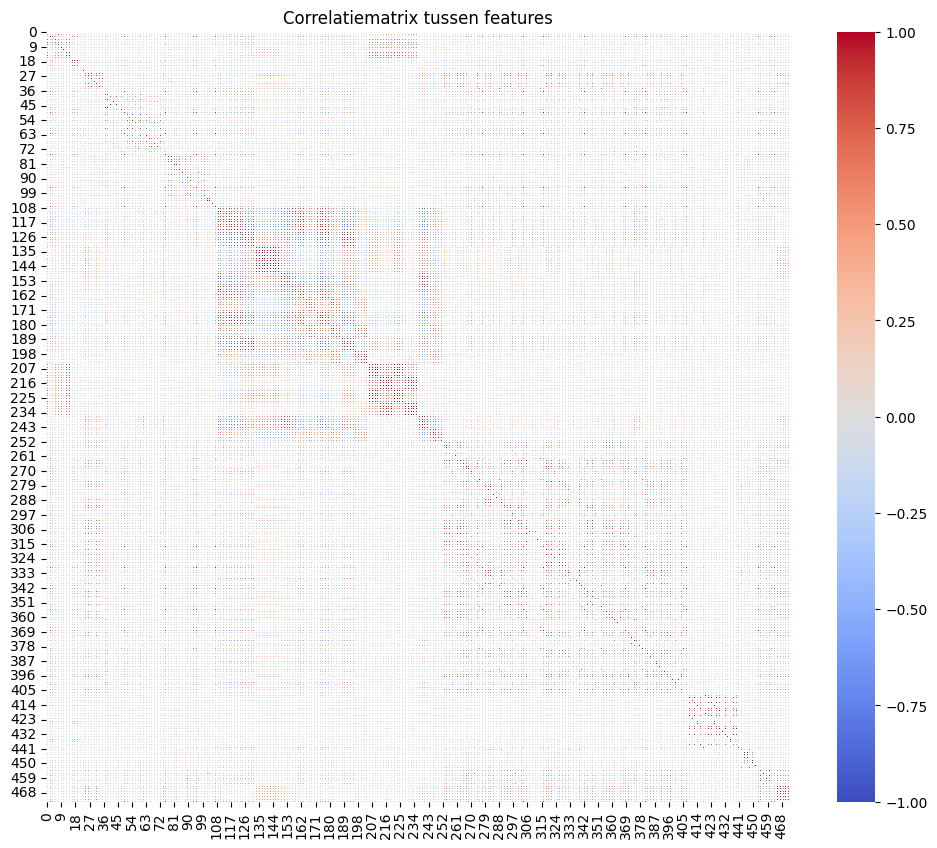

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Veronderstel dat 'features' een Pandas DataFrame is
corr_matrix = pd.DataFrame(features).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlatiematrix tussen features")
plt.show()
def colorplot(clf, ax, x, y, h=100):
    '''
    Overlay the decision areas as colors in an axes.

    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if len(Z.shape) > 1:
        Z = Z[:, 1]

    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm

def plot_roc_curve(y_score, y_truth):
    '''
    Plot an ROC curve.
    '''
    # Only take scores for class = 1
    # y_score = y_score[:, 1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_truth, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    # plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.3, 1.0, 10)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores  = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g")
    # axes.legend(loc="best")

    return plt


# Controleren voor elke feature of data normaal verdeeld is

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Aantal features normaal verdeeld in beide klassen: 63
Aantal significant verschillende features: 32


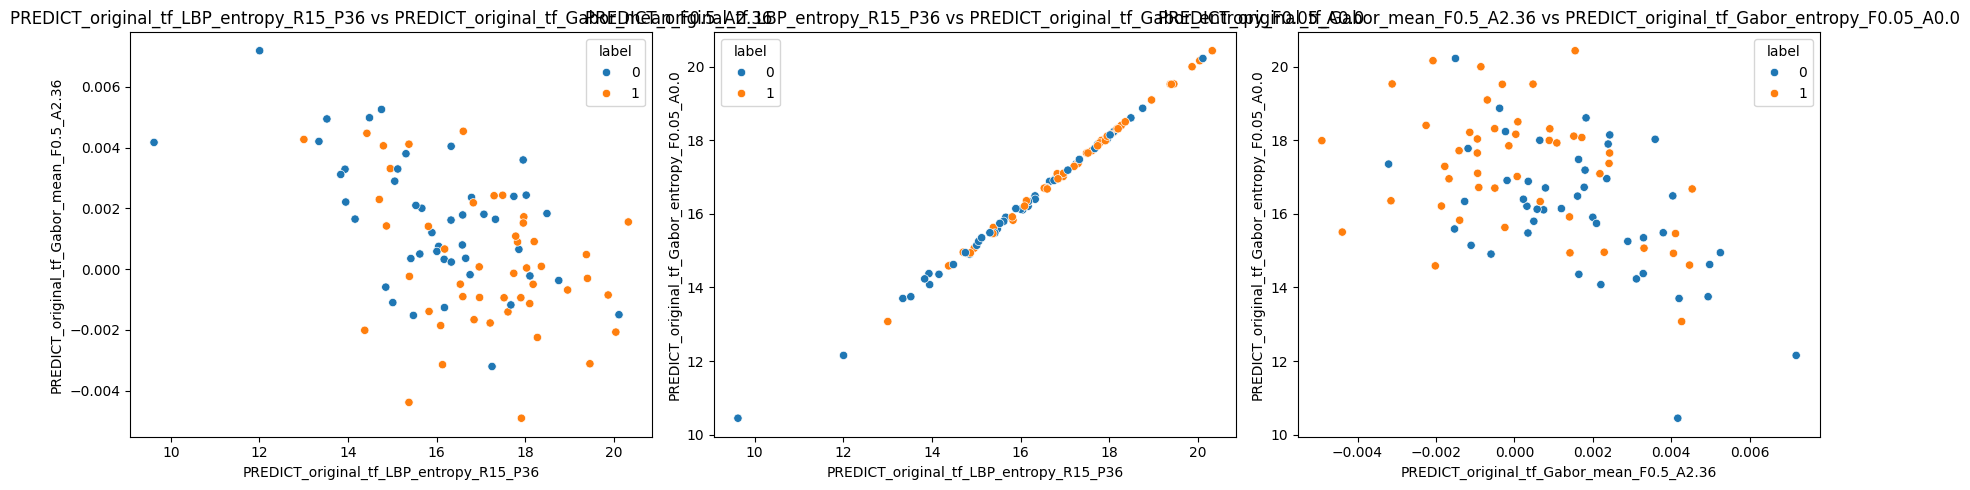

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind

# Shapiro-Wilk test voor normaliteit per feature
normal_features = []
for col in X_train.columns:
    class_0 = X_train[col][y_train == 0]
    class_1 = X_train[col][y_train == 1]

    p_0 = shapiro(class_0)[1]  # p-waarde klasse 0
    p_1 = shapiro(class_1)[1]  # p-waarde klasse 1

    if p_0 > 0.05 and p_1 > 0.05:
        normal_features.append(col)

print(f"Aantal features normaal verdeeld in beide klassen: {len(normal_features)}")

# t-test om significante verschillen te vinden
significant_features = []
alpha = 0.05

for col in normal_features:
    class_0 = X_train[col][y_train == 0]
    class_1 = X_train[col][y_train == 1]

    stat, p = ttest_ind(class_0, class_1, equal_var=False)

    if p < alpha:
        significant_features.append((col, p))

# Sorteer features op p-waarde (laagste eerst)
significant_features.sort(key=lambda x: x[1])

print(f"Aantal significant verschillende features: {len(significant_features)}")


# Minimaal 3 features nodig voor scatterplots
if len(significant_features) >= 3:
    feature_1, feature_2, feature_3 = [f[0] for f in significant_features[:9:3]]

    # Maak scatterplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(x=X_train[feature_1], y=X_train[feature_2], hue=y_train, ax=axes[0])
    axes[0].set_title(f'{feature_1} vs {feature_2}')

    sns.scatterplot(x=X_train[feature_1], y=X_train[feature_3], hue=y_train, ax=axes[1])
    axes[1].set_title(f'{feature_1} vs {feature_3}')

    sns.scatterplot(x=X_train[feature_2], y=X_train[feature_3], hue=y_train, ax=axes[2])
    axes[2].set_title(f'{feature_2} vs {feature_3}')

    plt.tight_layout()
    plt.show()
else:
    print("Niet genoeg significante features om scatterplots te maken.")



# KNN

## Finding optimal number of components


Testing with PCA variance ratio: 0.1
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

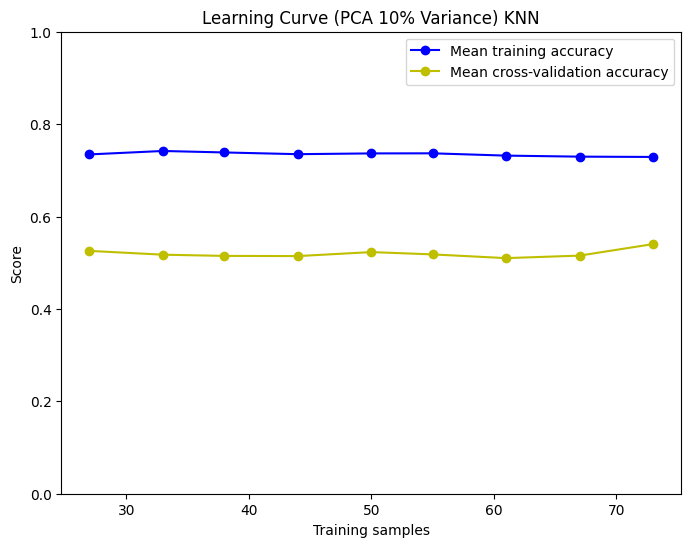


Testing with PCA variance ratio: 0.2
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

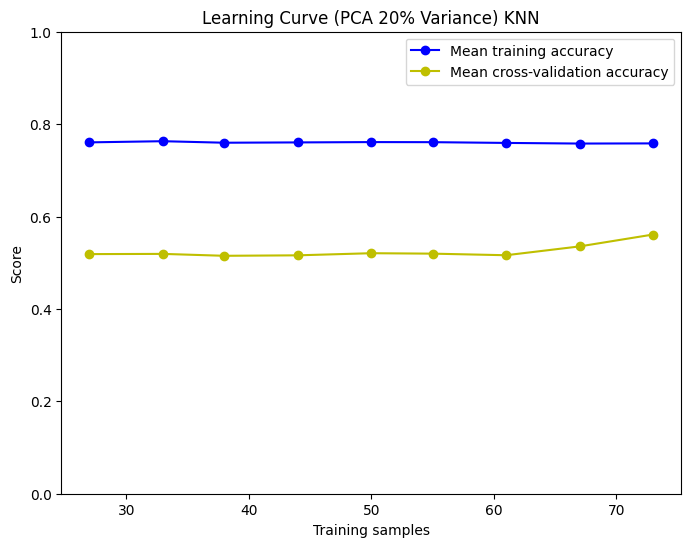


Testing with PCA variance ratio: 0.3
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

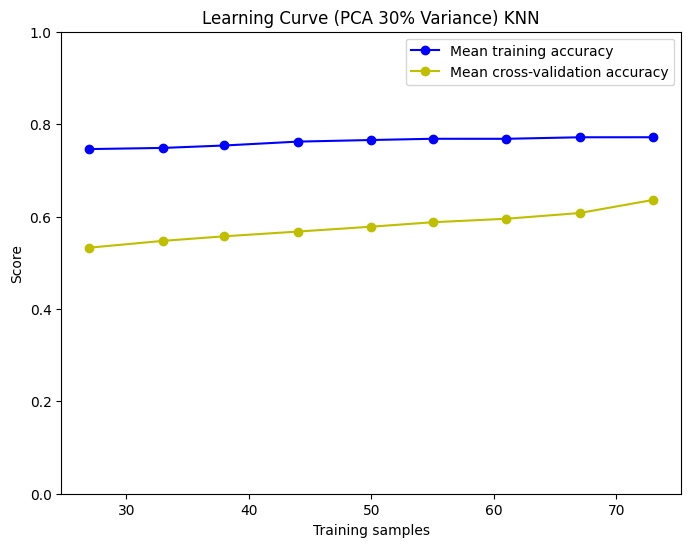


Testing with PCA variance ratio: 0.4
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

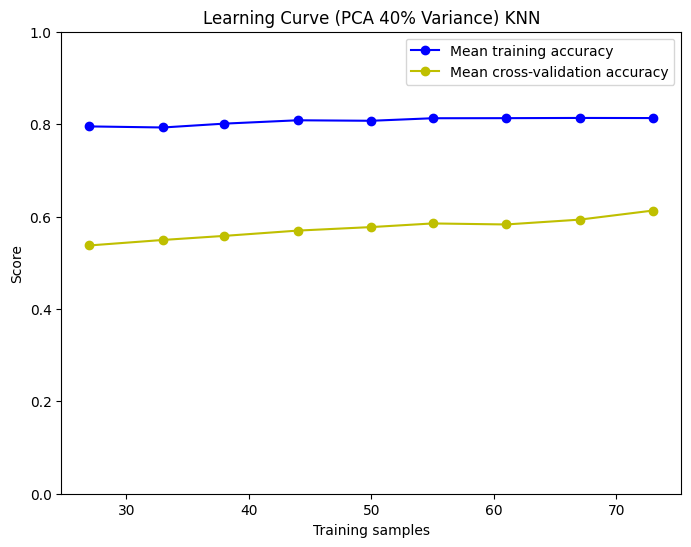


Testing with PCA variance ratio: 0.5
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

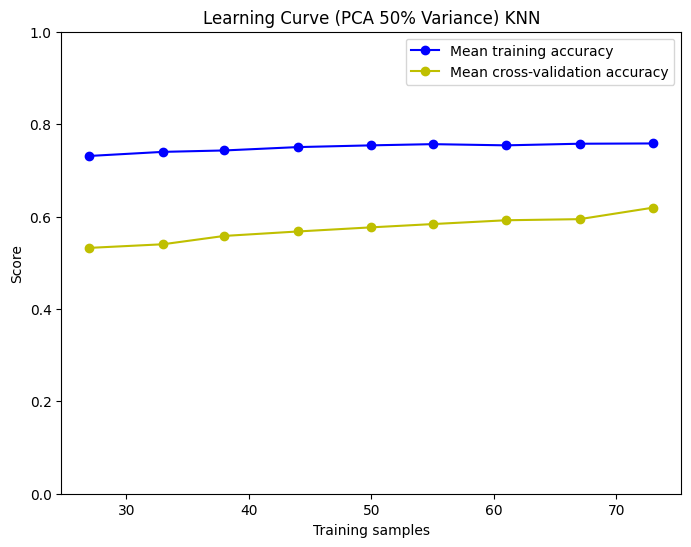


Testing with PCA variance ratio: 0.6
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

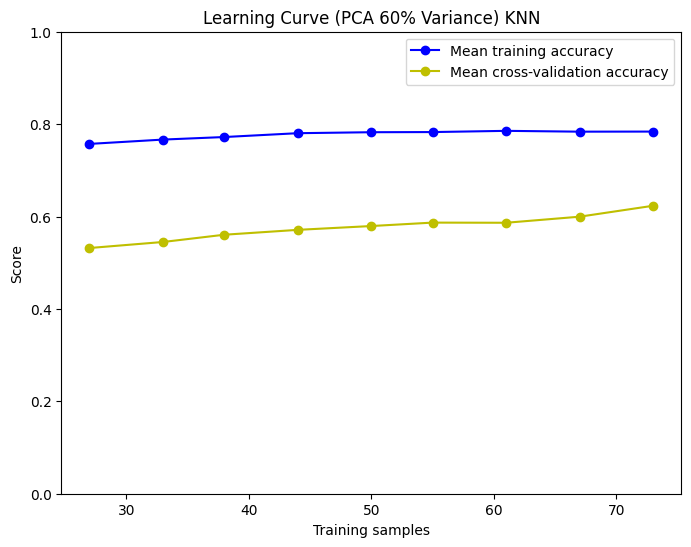


Testing with PCA variance ratio: 0.7
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

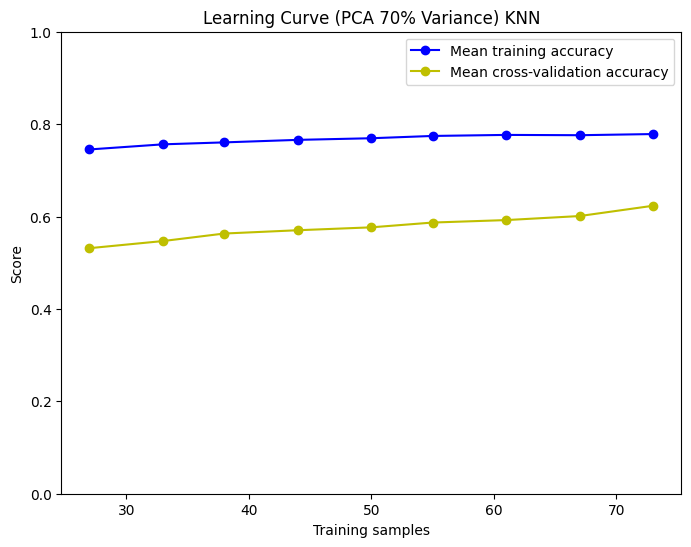


Testing with PCA variance ratio: 0.8
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

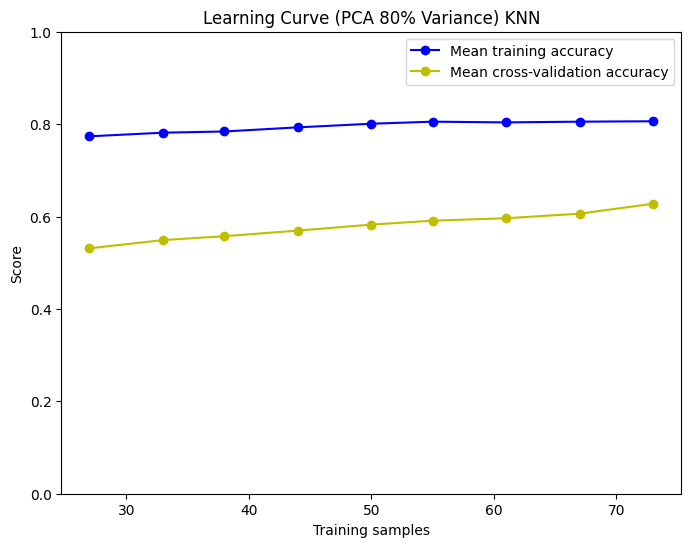


Testing with PCA variance ratio: 0.9
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

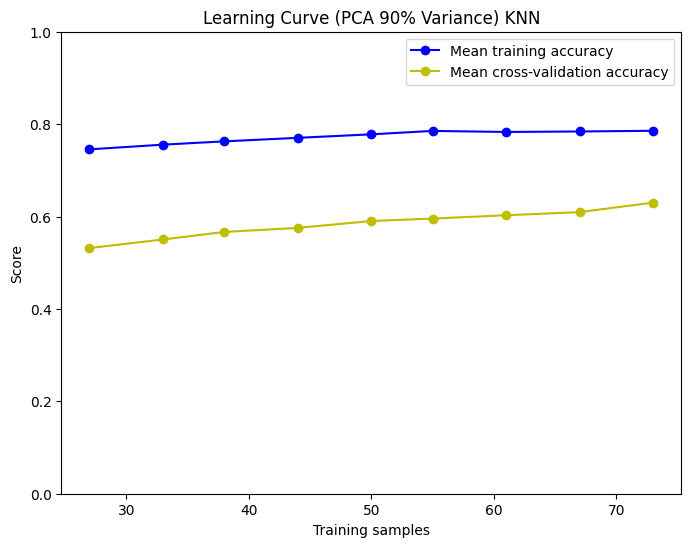


Testing with PCA variance ratio: 0.95
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Ru

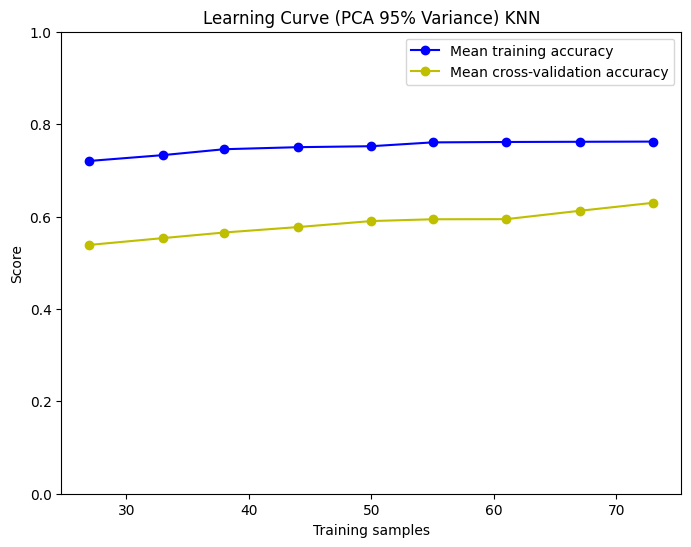

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score
from scipy import stats

# Zorg dat features en ground_truth numpy arrays zijn
features = np.array(features)
ground_truth = np.array(ground_truth)

# Hyperparameter grid
param_grid = {
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__n_neighbors': list(range(5, 30, 5))}

train_sizes_all = np.linspace(.3, 1.0, 10)
components_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

for components in components_range:
    print(f"\nTesting with PCA variance ratio: {components}")

    accuracies, sensitivities, specificities, f1_scores, auc_scores = [], [], [], [], []
    all_train_scores, all_test_scores = [], []

    fig, axes = plt.subplots(1, 1, figsize=(8, 6))

    for run in range(100):
        print(f"Run {run + 1}/100")

        X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=run)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        pca = decomposition.PCA(n_components=components)

        # Pipeline definiëren
        pipeline = make_pipeline(
            pca,
            KNeighborsClassifier()
        )


        clf = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        clf.fit(X_train_scaled, y_train)

        train_sizes, train_scores, test_scores = learning_curve(
            clf.best_estimator_, X_train_scaled, y_train,
            train_sizes=train_sizes_all, cv=5, n_jobs=-1
        )
        all_train_scores.append(np.mean(train_scores, axis=1))
        all_test_scores.append(np.mean(test_scores, axis=1))

    mean_train_scores = np.mean(all_train_scores, axis=0)
    mean_test_scores = np.mean(all_test_scores, axis=0)

    axes.plot(train_sizes, mean_train_scores, 'o-', color="b", label="Mean training accuracy")
    axes.plot(train_sizes, mean_test_scores, 'o-', color="y", label="Mean cross-validation accuracy")
    axes.set_xlabel("Training samples")
    axes.set_ylabel("Score")
    axes.set_title(f"Learning Curve (PCA {components*100:.0f}% Variance) KNN")
    axes.legend(loc="best")
    axes.set_ylim([0, 1])
    plt.show()

Run 1/100
Beste hyperparameters: {'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__weights': 'uniform', 'pca__n_components': 0.95}
Test accuracy: 0.4783
Sensitivity: 0.7500
Specificity: 0.3333
F1 score: 0.5000
AUC score voor deze run: 0.6208
Run 2/100
Beste hyperparameters: {'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__weights': 'uniform', 'pca__n_components': 0.95}
Test accuracy: 0.3913
Sensitivity: 0.5000
Specificity: 0.3333
F1 score: 0.3636
AUC score voor deze run: 0.4375
Run 3/100
Beste hyperparameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform', 'pca__n_components': 0.95}
Test accuracy: 0.6957
Sensitivity: 0.6667
Specificity: 0.7273
F1 score: 0.6957
AUC score voor deze run: 0.7311
Run 4/100
Beste hyperparameters: {'kneighborsclassifier__n_neighbors': 25, 'kneighborsclassifier__weights': 'uniform', 'pca__n_components': 0.95}
Test accuracy: 0.5217
Sensitivity: 0.1667
Specificity: 0.9091
F1 score: 0.2667
AUC 

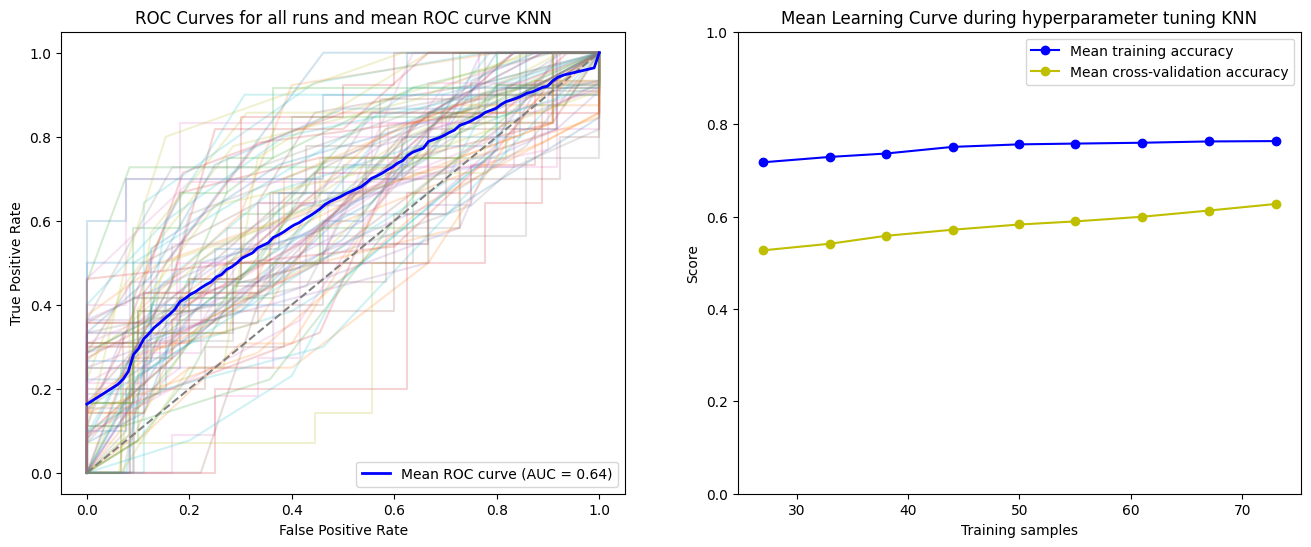

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif, chi2, SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

# Zorg ervoor dat features en ground_truth numpy arrays zijn
features = np.array(features)  # Zet je DataFrame om naar een numpy array
ground_truth = np.array(ground_truth)  # Zet ground_truth om naar numpy array

# Opslag voor accuracies en metrics
results = []
accuracies = []
sensitivities = []
specificities = []
f1_scores = []
roc_curves = []
auc_scores = []
mean_fpr = np.linspace(0, 1, 100)  # Genereer een vaste FPR voor de gemiddelde ROC-curve
mean_tpr = np.zeros_like(mean_fpr)  # Zet de gemiddelde TPR op 0

# Arrays for learning curve data
all_train_scores = []
all_test_scores = []
train_sizes_all = np.linspace(.3, 1.0, 10)
# Create subplots for both ROC and Learning Curves
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for run in range(100):
    print(f"Run {run + 1}/100")

    # Split de data in training en test (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=run)

    # Scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    pca = decomposition.PCA()

    # Pipeline definiëren
    pipeline = make_pipeline(
        pca,
        KNeighborsClassifier()
    )

    param_grid = {
    'pca__n_components': [0.95],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__n_neighbors': list(range(5, 30, 5))}

    clf = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train_scaled, y_train)

    # Beste model testen
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Confusion Matrix voor Sensitiviteit en Specificiteit
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1_scores.append(f1)

    # ROC berekenen
    y_score = clf.predict_proba(X_test_scaled)[:, 1]  # Positieve klasse kans
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    auc_scores.append(auc_score)
    roc_curves.append((fpr, tpr, auc_score))

    # Resultaten opslaan
    results.append({"parameters": clf.best_params_, "accuracy": accuracy, "sensitivity": sensitivity,
                    "specificity": specificity, "f1_score": f1, "auc": auc_score})
    print(f"Beste hyperparameters: {clf.best_params_}")
    print(f"Test accuracy: {accuracy:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 score: {f1:.4f}")
    print(f"AUC score voor deze run: {auc_score:.4f}")

    # Interpoleer de TPR naar een vaste FPR om de gemiddelde ROC-curve te berekenen
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

    # Plot de ROC-curve voor deze run
    axes[0].plot(fpr, tpr, alpha=0.2)

    # Learning curve
    # plot_learning_curve(clf.best_estimator_, 'Learning Curve', X_train_scaled, y_train, axes[1])
    train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X_train_scaled, y_train,
                                                            train_sizes=train_sizes_all, cv=5, n_jobs=-1)
    all_train_scores.append(np.mean(train_scores, axis=1))
    all_test_scores.append(np.mean(test_scores, axis=1))

# Gemiddelde en Standaarddeviatie
mean_accuracy = np.mean(accuracies)
mean_sensitivity = np.mean(sensitivities)
mean_specificity = np.mean(specificities)
mean_f1_score = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)

std_accuracy = np.std(accuracies)
std_sensitivity = np.std(sensitivities)
std_specificity = np.std(specificities)
std_f1_score = np.std(f1_scores)
std_auc = np.std(auc_scores)

#gemiddelde learningcurve variabelen
mean_train_scores = np.mean(all_train_scores, axis=0)
mean_test_scores = np.mean(all_test_scores, axis=0)
# Confidence Intervals (95% CI)
confidence_interval_accuracy = stats.t.interval(0.95, len(accuracies)-1, loc=mean_accuracy, scale=std_accuracy/np.sqrt(len(accuracies)))
confidence_interval_sensitivity = stats.t.interval(0.95, len(sensitivities)-1, loc=mean_sensitivity, scale=std_sensitivity/np.sqrt(len(sensitivities)))
confidence_interval_specificity = stats.t.interval(0.95, len(specificities)-1, loc=mean_specificity, scale=std_specificity/np.sqrt(len(specificities)))
confidence_interval_f1 = stats.t.interval(0.95, len(f1_scores)-1, loc=mean_f1_score, scale=std_f1_score/np.sqrt(len(f1_scores)))
confidence_interval_auc = stats.t.interval(0.95, len(auc_scores)-1, loc=mean_auc, scale=std_auc/np.sqrt(len(auc_scores)))

# Gemiddelde en Confidence Intervals printen
print(f"\nMean test accuracy over 100 runs: {mean_accuracy:.4f} (SD: {std_accuracy:.4f}, 95% CI: {confidence_interval_accuracy})")
print(f"Mean sensitivity over 100 runs: {mean_sensitivity:.4f} (SD: {std_sensitivity:.4f}, 95% CI: {confidence_interval_sensitivity})")
print(f"Mean specificity over 100 runs: {mean_specificity:.4f} (SD: {std_specificity:.4f}, 95% CI: {confidence_interval_specificity})")
print(f"Mean F1-score over 100 runs: {mean_f1_score:.4f} (SD: {std_f1_score:.4f}, 95% CI: {confidence_interval_f1})")
print(f"Mean AUC over 100 runs: {mean_auc:.4f} (SD: {std_auc:.4f}, 95% CI: {confidence_interval_auc})")

# Sorteren en tonen van resultaten
sorted_results = sorted(results, key=lambda x: x["accuracy"], reverse=True)[:10]
print("\nTop 10 Best Results:")
for i, res in enumerate(sorted_results):
    print(f"{i+1}. Hyperparameters: {res['parameters']}, Accuracy: {res['accuracy']:.4f}, Sensitivity: {res['sensitivity']:.4f}, Specificity: {res['specificity']:.4f}, F1: {res['f1_score']:.4f}, AUC: {res['auc']:.4f}")

# ROC-curve plotting met labels
mean_tpr /= 100
# Genereer de gemiddelde ROC-curve
axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray")
axes[0].plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean ROC curve (AUC = {mean_auc:.2f})')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curves for all runs and mean ROC curve KNN")
axes[0].legend(loc="best")

# Learning curve plotting met labels
axes[1].plot(train_sizes, mean_train_scores, 'o-', color="b", label="Mean training accuracy")
axes[1].plot(train_sizes, mean_test_scores, 'o-', color="y", label="Mean cross-validation accuracy")
axes[1].set_xlabel("Training samples")
axes[1].set_ylabel("Score")
axes[1].set_title("Mean Learning Curve during hyperparameter tuning KNN")
axes[1].set_ylim(0, 1)
axes[1].legend(loc="best")

# Random forest

Run 1/100
Beste hyperparameters: {'max_features': 0.5, 'min_impurity_decrease': 0.005, 'n_estimators': 90}
Test accuracy: 0.6522
Sensitivity: 0.8750
Specificity: 0.5333
F1 score: 0.6364
AUC score voor deze run: 0.8458
Run 2/100
Beste hyperparameters: {'max_features': 0.5, 'min_impurity_decrease': 0.1, 'n_estimators': 75}
Test accuracy: 0.6957
Sensitivity: 0.7500
Specificity: 0.6667
F1 score: 0.6316
AUC score voor deze run: 0.7333
Run 3/100
Beste hyperparameters: {'max_features': 0.5, 'min_impurity_decrease': 0.2, 'n_estimators': 60}
Test accuracy: 0.7826
Sensitivity: 0.5833
Specificity: 1.0000
F1 score: 0.7368
AUC score voor deze run: 0.8864
Run 4/100
Beste hyperparameters: {'max_features': 0.5, 'min_impurity_decrease': 0.1, 'n_estimators': 60}
Test accuracy: 0.7391
Sensitivity: 0.5000
Specificity: 1.0000
F1 score: 0.6667
AUC score voor deze run: 0.7652
Run 5/100
Beste hyperparameters: {'max_features': 0.5, 'min_impurity_decrease': 0.1, 'n_estimators': 90}
Test accuracy: 0.7826
Sensiti

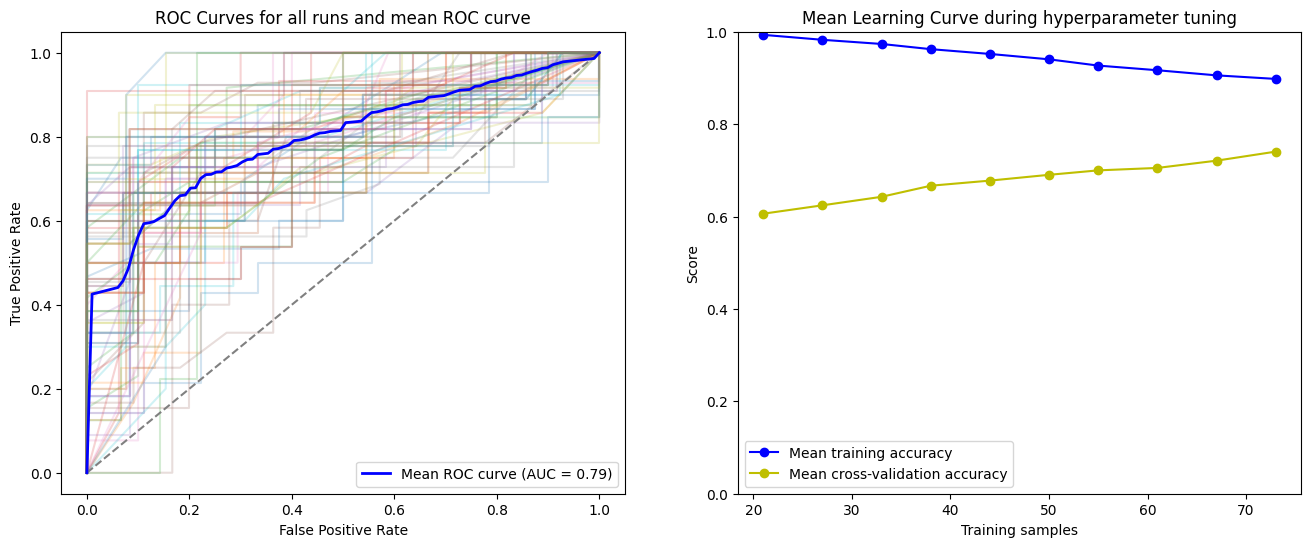

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from scipy import stats


# Hyperparameter tuning met GridSearchCV
param_grid = {
        'n_estimators': [60, 75, 90],
        'min_impurity_decrease': [0.005, 0.1, 0.2],
        'max_features': [0.5]
    }

# Opslag voor accuracies en metrics
results = []
accuracies = []
sensitivities = []
specificities = []
f1_scores = []
roc_curves = []
auc_scores = []
mean_fpr = np.linspace(0, 1, 100)  # Genereer een vaste FPR voor de gemiddelde ROC-curve
mean_tpr = np.zeros_like(mean_fpr)  # Zet de gemiddelde TPR op 0

# Arrays for learning curve data
all_train_scores = []
all_test_scores = []
train_sizes_all = np.linspace(.3, 1.0, 10)
# Create subplots for both ROC and Learning Curves
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Aantal random splits
split = 100

for run in range(split):
    print(f"Run {run + 1}/{split}")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=run)

    # Random Forest model
    forest = RandomForestClassifier(random_state=run)

    # GridSearch instellen
    clf = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit on the selected features
    clf.fit(X_train, y_train)

    # Beste model testen
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Confusion Matrix voor Sensitiviteit en Specificiteit
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1_scores.append(f1)

    # ROC berekenen
    y_score = clf.predict_proba(X_test)[:, 1]  # Positieve klasse kans
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    auc_scores.append(auc_score)
    roc_curves.append((fpr, tpr, auc_score))

    # Resultaten opslaan
    results.append({"parameters": clf.best_params_, "accuracy": accuracy, "sensitivity": sensitivity,
                    "specificity": specificity, "f1_score": f1, "auc": auc_score})
    print(f"Beste hyperparameters: {clf.best_params_}")
    print(f"Test accuracy: {accuracy:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 score: {f1:.4f}")
    print(f"AUC score voor deze run: {auc_score:.4f}")

    # Interpoleer de TPR naar een vaste FPR om de gemiddelde ROC-curve te berekenen
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

    # Plot de ROC-curve voor deze run
    axes[0].plot(fpr, tpr, alpha=0.2)

    # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X_train, y_train,
                                                            train_sizes=train_sizes_all, cv=5, n_jobs=-1)
    all_train_scores.append(np.mean(train_scores, axis=1))
    all_test_scores.append(np.mean(test_scores, axis=1))

# Gemiddelde en Standaarddeviatie
mean_accuracy = np.mean(accuracies)
mean_sensitivity = np.mean(sensitivities)
mean_specificity = np.mean(specificities)
mean_f1_score = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)

std_accuracy = np.std(accuracies)
std_sensitivity = np.std(sensitivities)
std_specificity = np.std(specificities)
std_f1_score = np.std(f1_scores)
std_auc = np.std(auc_scores)

#gemiddelde learningcurve variabelen
mean_train_scores = np.mean(all_train_scores, axis=0)
mean_test_scores = np.mean(all_test_scores, axis=0)
# Confidence Intervals (95% CI)
confidence_interval_accuracy = stats.t.interval(0.95, len(accuracies)-1, loc=mean_accuracy, scale=std_accuracy/np.sqrt(len(accuracies)))
confidence_interval_sensitivity = stats.t.interval(0.95, len(sensitivities)-1, loc=mean_sensitivity, scale=std_sensitivity/np.sqrt(len(sensitivities)))
confidence_interval_specificity = stats.t.interval(0.95, len(specificities)-1, loc=mean_specificity, scale=std_specificity/np.sqrt(len(specificities)))
confidence_interval_f1 = stats.t.interval(0.95, len(f1_scores)-1, loc=mean_f1_score, scale=std_f1_score/np.sqrt(len(f1_scores)))
confidence_interval_auc = stats.t.interval(0.95, len(auc_scores)-1, loc=mean_auc, scale=std_auc/np.sqrt(len(auc_scores)))

# Gemiddelde en Confidence Intervals printen
print(f"\nMean test accuracy over 100 runs: {mean_accuracy:.4f} (SD: {std_accuracy:.4f}, 95% CI: {confidence_interval_accuracy})")
print(f"Mean sensitivity over 100 runs: {mean_sensitivity:.4f} (SD: {std_sensitivity:.4f}, 95% CI: {confidence_interval_sensitivity})")
print(f"Mean specificity over 100 runs: {mean_specificity:.4f} (SD: {std_specificity:.4f}, 95% CI: {confidence_interval_specificity})")
print(f"Mean F1-score over 100 runs: {mean_f1_score:.4f} (SD: {std_f1_score:.4f}, 95% CI: {confidence_interval_f1})")
print(f"Mean AUC over 100 runs: {mean_auc:.4f} (SD: {std_auc:.4f}, 95% CI: {confidence_interval_auc})")

# Sorteren en tonen van resultaten
sorted_results = sorted(results, key=lambda x: x["accuracy"], reverse=True)[:10]
print("\nTop 10 Best Results:")
for i, res in enumerate(sorted_results):
    print(f"{i+1}. Hyperparameters: {res['parameters']}, Accuracy: {res['accuracy']:.4f}, Sensitivity: {res['sensitivity']:.4f}, Specificity: {res['specificity']:.4f}, F1: {res['f1_score']:.4f}, AUC: {res['auc']:.4f}")

# ROC-curve plotting met labels
mean_tpr /= 100
mean_tpr [0] = 0
# Genereer de gemiddelde ROC-curve
axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray")
axes[0].plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean ROC curve (AUC = {mean_auc:.2f})')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curves for all runs and mean ROC curve")
axes[0].legend(loc="best")

# Learning curve plotting met labels
axes[1].plot(train_sizes, mean_train_scores, 'o-', color="b", label="Mean training accuracy")
axes[1].plot(train_sizes, mean_test_scores, 'o-', color="y", label="Mean cross-validation accuracy")
axes[1].set_xlabel("Training samples")
axes[1].set_ylabel("Score")
axes[1].set_title("Mean Learning Curve during hyperparameter tuning")
axes[1].set_ylim(0, 1)
axes[1].legend(loc="best")

#SVM


##SVM component selection with learning curves from the training data


Cross-validation with PCA variance ratio in trainingset: 0.3
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Ru

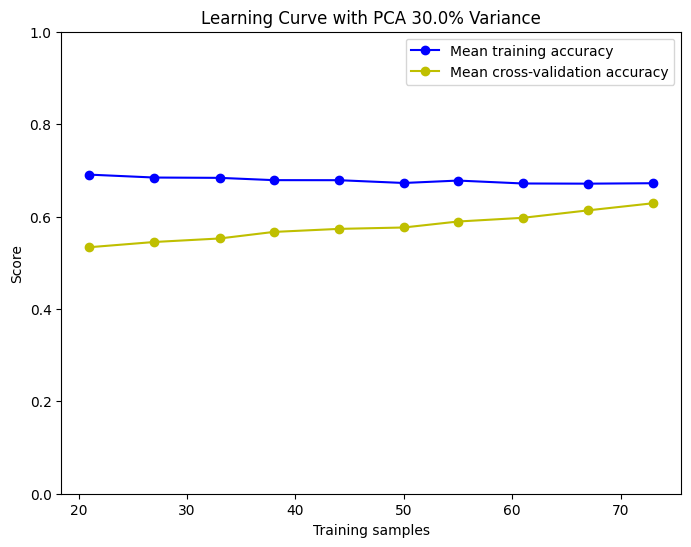

Cross-validation with PCA variance ratio in trainingset: 0.4
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Ru

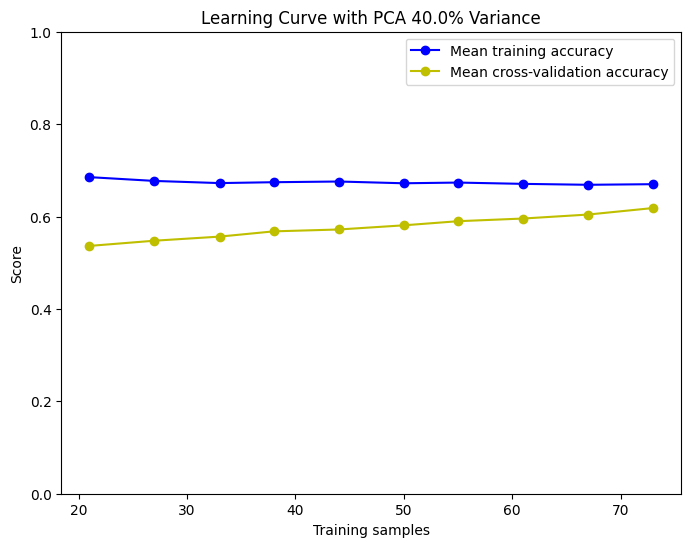

Cross-validation with PCA variance ratio in trainingset: 0.5
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Ru

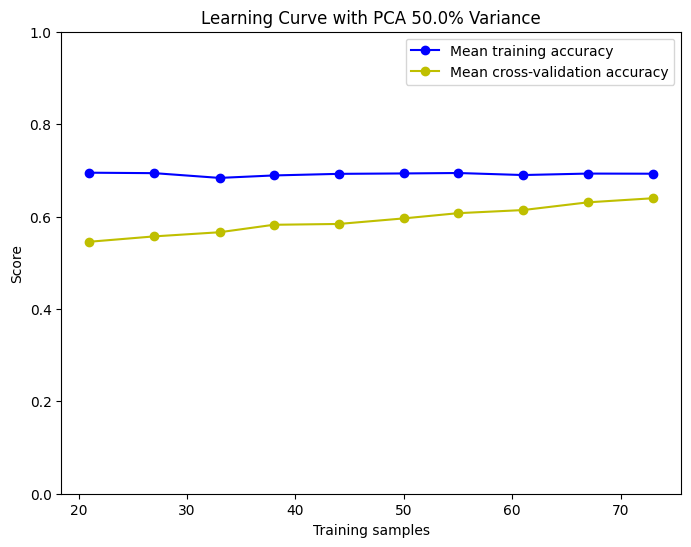

Cross-validation with PCA variance ratio in trainingset: 0.6
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Ru

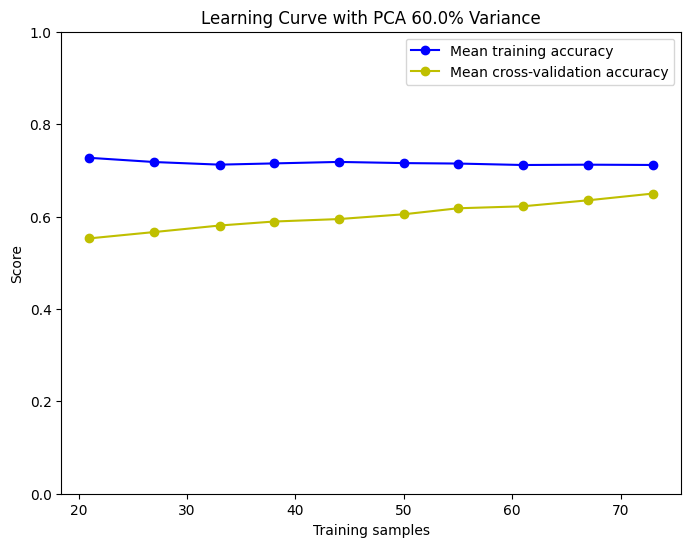

Cross-validation with PCA variance ratio in trainingset: 0.7
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Ru

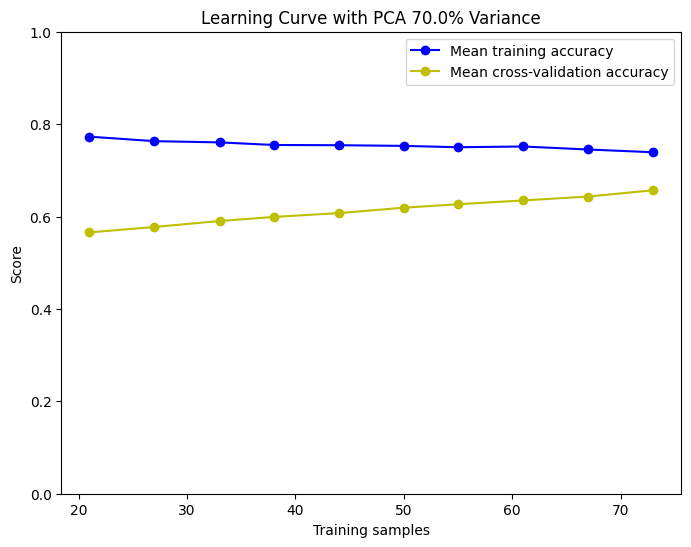

Cross-validation with PCA variance ratio in trainingset: 0.8
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Ru

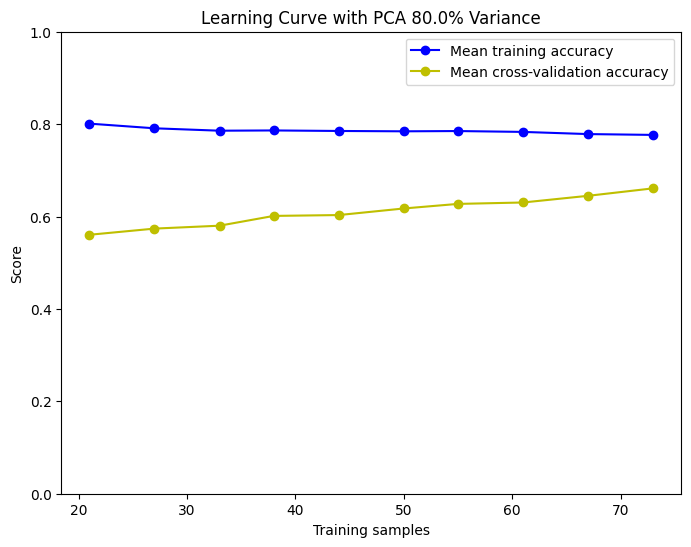

Cross-validation with PCA variance ratio in trainingset: 0.9
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Ru

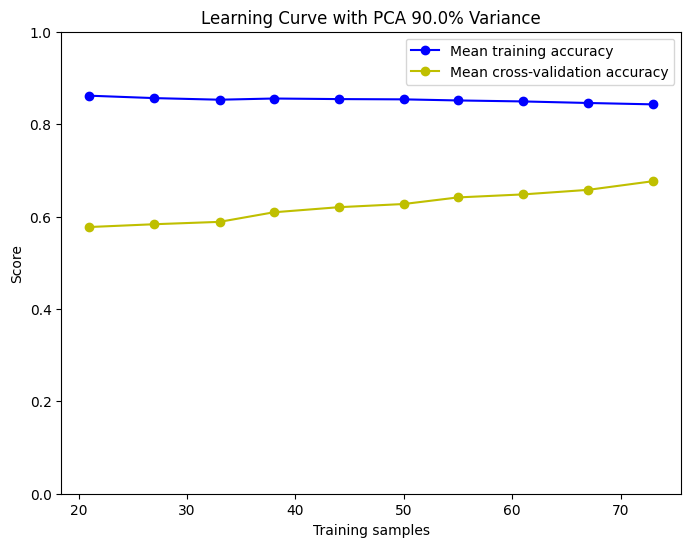

Cross-validation with PCA variance ratio in trainingset: 0.95
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
R

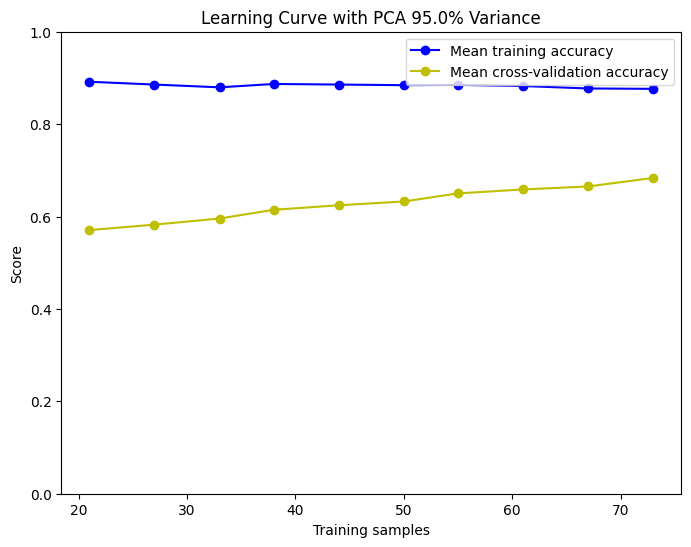

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score
from sklearn.model_selection import learning_curve
import statistics
from scipy import stats


# Hyperparameter grid
param_grid = [
    {'svc__C': [0.001, 0.01, 0.1, 0.5], 'svc__kernel': ['linear']},
    {'svc__C': [0.001, 0.01, 0.1, 0.5], 'svc__kernel': ['rbf'], 'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
    {'svc__C': [0.001, 0.01, 0.1, 0.5], 'svc__kernel': ['poly'], 'svc__degree': [2, 3, 4, 5]}
]
train_sizes_all = np.linspace(.3, 1.0, 10)

# Loop voor verschillende percentages van de variantie voor PCA
components_range = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

for components in components_range:  # Variëren van het aantal PCA-componenten
    print(f"Cross-validation with PCA variance ratio in trainingset: {components}")
    # Arrays voor het opslaan van resultaten
    results = []
    accuracies = []
    sensitivities = []
    specificities = []
    f1_scores = []
    roc_curves = []
    auc_scores = []

    # Arrays voor learning curve data
    all_train_scores = []
    all_test_scores = []
    # Maak een nieuwe figuur voor elke waarde van PCA-componenten
    fig, axes = plt.subplots(1, 1, figsize=(8, 6))

    # 100 Random Splits
    for run in range(100):  # 100 verschillende splits
        print(f"Run {run + 1}/100")

        # Split de data in training en test (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=run)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # PCA
        pca = decomposition.PCA(n_components=components)  # Aantal componenten op basis van de variantie

        # SVM
        svm = SVC(probability=True)  # Probability=True nodig voor ROC

        # Pipeline
        pipeline = make_pipeline(pca, svm)

        # GridSearch instellen
        clf = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
        clf.fit(X_train_scaled, y_train)

        # Learning curve
        train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X_train_scaled, y_train,
                                                                train_sizes=train_sizes_all, cv=5, n_jobs=-1)
        all_train_scores.append(np.mean(train_scores, axis=1))
        all_test_scores.append(np.mean(test_scores, axis=1))

    # Gemiddelde Learning Curve
    mean_train_scores = np.mean(all_train_scores, axis=0)
    mean_test_scores = np.mean(all_test_scores, axis=0)
    axes.plot(train_sizes, mean_train_scores, 'o-', color="b", label="Mean training accuracy")
    axes.plot(train_sizes, mean_test_scores, 'o-', color="y", label="Mean cross-validation accuracy")
    axes.set_xlabel("Training samples")
    axes.set_ylabel("Score")
    axes.set_title(f"Learning Curve with PCA {components*100}% Variance")
    axes.legend(loc="best")
    axes.set_ylim([0, 1])
    plt.show()


## SVM pipeline

Run 1/100
Beste hyperparameters: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Test accuracy: 0.5652
Sensitivity: 0.6250
Specificity: 0.5333
F1 score: 0.5000
AUC score voor deze run: 0.6167
Run 2/100
Beste hyperparameters: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Test accuracy: 0.4783
Sensitivity: 0.7500
Specificity: 0.3333
F1 score: 0.5000
AUC score voor deze run: 0.6583
Run 3/100
Beste hyperparameters: {'svc__C': 0.01, 'svc__kernel': 'linear'}
Test accuracy: 0.7391
Sensitivity: 0.7500
Specificity: 0.7273
F1 score: 0.7500
AUC score voor deze run: 0.7879
Run 4/100
Beste hyperparameters: {'svc__C': 0.01, 'svc__kernel': 'linear'}
Test accuracy: 0.6522
Sensitivity: 0.5000
Specificity: 0.8182
F1 score: 0.6000
AUC score voor deze run: 0.7879
Run 5/100
Beste hyperparameters: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Test accuracy: 0.8261
Sensitivity: 0.7778
Specificity: 0.8571
F1 score: 0.7778
AUC score voor deze run: 0.8571
Run 6/100
Beste hyperparameters: {'svc__C': 0.1, 'svc__kernel': 'linear'}

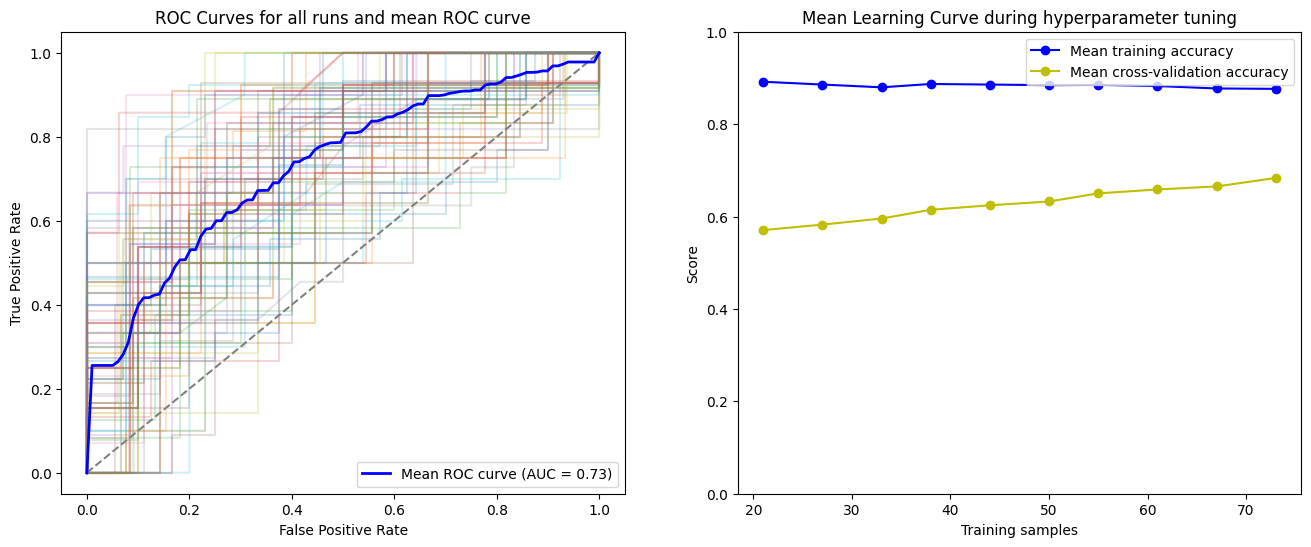

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score
from sklearn.model_selection import learning_curve
import statistics
from scipy import stats


# Hyperparameter grid
param_grid = [
    {'svc__C': [0.001, 0.01, 0.1, 0.5], 'svc__kernel': ['linear']},
    {'svc__C': [0.001, 0.01, 0.1, 0.5], 'svc__kernel': ['rbf'], 'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
    {'svc__C': [0.001, 0.01, 0.1, 0.5], 'svc__kernel': ['poly'], 'svc__degree': [2, 3, 4, 5]}
]
# Opslag voor accuracies en metrics
results = []
accuracies = []
sensitivities = []
specificities = []
f1_scores = []
roc_curves = []
auc_scores = []
mean_fpr = np.linspace(0, 1, 100)  # Genereer een vaste FPR voor de gemiddelde ROC-curve
mean_tpr = np.zeros_like(mean_fpr)  # Zet de gemiddelde TPR op 0

# Arrays for learning curve data
all_train_scores = []
all_test_scores = []
train_sizes_all = np.linspace(.3, 1.0, 10)
# Create subplots for both ROC and Learning Curves
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 100 Random Splits
for run in range(100):  # 100 verschillende splits
    print(f"Run {run + 1}/100")

    # Split de data in training en test (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=run)

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # PCA
    pca = decomposition.PCA(n_components = 0.95)

    # SVM
    svm = SVC(probability=True)  # Probability=True nodig voor ROC

    # Pipeline
    pipeline = make_pipeline(pca, svm)

    # GridSearch instellen
    clf = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train_scaled, y_train)

    # Beste model testen
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Confusion Matrix voor Sensitiviteit en Specificiteit
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1_scores.append(f1)

    # ROC berekenen
    y_score = clf.predict_proba(X_test_scaled)[:, 1]  # Positieve klasse kans
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    auc_scores.append(auc_score)
    roc_curves.append((fpr, tpr, auc_score))

    # Resultaten opslaan
    results.append({"parameters": clf.best_params_, "accuracy": accuracy, "sensitivity": sensitivity,
                    "specificity": specificity, "f1_score": f1, "auc": auc_score})
    print(f"Beste hyperparameters: {clf.best_params_}")
    print(f"Test accuracy: {accuracy:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 score: {f1:.4f}")
    print(f"AUC score voor deze run: {auc_score:.4f}")

    # Interpoleer de TPR naar een vaste FPR om de gemiddelde ROC-curve te berekenen
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

    # Plot de ROC-curve voor deze run
    axes[0].plot(fpr, tpr, alpha=0.2)

    # Learning curve
    # plot_learning_curve(clf.best_estimator_, 'Learning Curve', X_train_scaled, y_train, axes[1])
    train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X_train_scaled, y_train,
                                                            train_sizes=train_sizes_all, cv=5, n_jobs=-1)
    all_train_scores.append(np.mean(train_scores, axis=1))
    all_test_scores.append(np.mean(test_scores, axis=1))

# Gemiddelde en Standaarddeviatie
mean_accuracy = np.mean(accuracies)
mean_sensitivity = np.mean(sensitivities)
mean_specificity = np.mean(specificities)
mean_f1_score = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)

std_accuracy = np.std(accuracies)
std_sensitivity = np.std(sensitivities)
std_specificity = np.std(specificities)
std_f1_score = np.std(f1_scores)
std_auc = np.std(auc_scores)

#gemiddelde learningcurve variabelen
mean_train_scores = np.mean(all_train_scores, axis=0)
mean_test_scores = np.mean(all_test_scores, axis=0)
# Confidence Intervals (95% CI)
confidence_interval_accuracy = stats.t.interval(0.95, len(accuracies)-1, loc=mean_accuracy, scale=std_accuracy/np.sqrt(len(accuracies)))
confidence_interval_sensitivity = stats.t.interval(0.95, len(sensitivities)-1, loc=mean_sensitivity, scale=std_sensitivity/np.sqrt(len(sensitivities)))
confidence_interval_specificity = stats.t.interval(0.95, len(specificities)-1, loc=mean_specificity, scale=std_specificity/np.sqrt(len(specificities)))
confidence_interval_f1 = stats.t.interval(0.95, len(f1_scores)-1, loc=mean_f1_score, scale=std_f1_score/np.sqrt(len(f1_scores)))
confidence_interval_auc = stats.t.interval(0.95, len(auc_scores)-1, loc=mean_auc, scale=std_auc/np.sqrt(len(auc_scores)))

# Gemiddelde en Confidence Intervals printen
print(f"\nMean test accuracy over 100 runs: {mean_accuracy:.4f} (SD: {std_accuracy:.4f}, 95% CI: {confidence_interval_accuracy})")
print(f"Mean sensitivity over 100 runs: {mean_sensitivity:.4f} (SD: {std_sensitivity:.4f}, 95% CI: {confidence_interval_sensitivity})")
print(f"Mean specificity over 100 runs: {mean_specificity:.4f} (SD: {std_specificity:.4f}, 95% CI: {confidence_interval_specificity})")
print(f"Mean F1-score over 100 runs: {mean_f1_score:.4f} (SD: {std_f1_score:.4f}, 95% CI: {confidence_interval_f1})")
print(f"Mean AUC over 100 runs: {mean_auc:.4f} (SD: {std_auc:.4f}, 95% CI: {confidence_interval_auc})")

# Sorteren en tonen van resultaten
sorted_results = sorted(results, key=lambda x: x["accuracy"], reverse=True)[:10]
print("\nTop 10 Best Results:")
for i, res in enumerate(sorted_results):
    print(f"{i+1}. Hyperparameters: {res['parameters']}, Accuracy: {res['accuracy']:.4f}, Sensitivity: {res['sensitivity']:.4f}, Specificity: {res['specificity']:.4f}, F1: {res['f1_score']:.4f}, AUC: {res['auc']:.4f}")

# ROC-curve plotting met labels
mean_tpr /= 100
mean_tpr[0]=0
# Genereer de gemiddelde ROC-curve
axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray")
axes[0].plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean ROC curve (AUC = {mean_auc:.2f})')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curves for all runs and mean ROC curve")
axes[0].legend(loc="best")

# Learning curve plotting met labels
axes[1].plot(train_sizes, mean_train_scores, 'o-', color="b", label="Mean training accuracy")
axes[1].plot(train_sizes, mean_test_scores, 'o-', color="y", label="Mean cross-validation accuracy")
axes[1].set_xlabel("Training samples")
axes[1].set_ylabel("Score")
axes[1].set_title("Mean Learning Curve during hyperparameter tuning")
axes[1].set_ylim(0, 1)
axes[1].legend(loc="best")

# LDA


Run 1/100
Beste aantal componenten (PCA): 0.5
Accuracy     : 0.4348
Sensitiviteit: 0.6250
Specificiteit: 0.3333
F1-score     : 0.4348
AUC          : 0.5667
Run 2/100
Beste aantal componenten (PCA): 0.5
Accuracy     : 0.3913
Sensitiviteit: 0.6250
Specificiteit: 0.2667
F1-score     : 0.4167
AUC          : 0.4750
Run 3/100
Beste aantal componenten (PCA): 0.5
Accuracy     : 0.6957
Sensitiviteit: 0.6667
Specificiteit: 0.7273
F1-score     : 0.6957
AUC          : 0.7652
Run 4/100
Beste aantal componenten (PCA): 0.5
Accuracy     : 0.5652
Sensitiviteit: 0.4167
Specificiteit: 0.7273
F1-score     : 0.5000
AUC          : 0.7121
Run 5/100
Beste aantal componenten (PCA): 0.5
Accuracy     : 0.6522
Sensitiviteit: 0.7778
Specificiteit: 0.5714
F1-score     : 0.6364
AUC          : 0.7857
Run 6/100
Beste aantal componenten (PCA): 0.5
Accuracy     : 0.6957
Sensitiviteit: 0.7143
Specificiteit: 0.6667
F1-score     : 0.7407
AUC          : 0.8016
Run 7/100
Beste aantal componenten (PCA): 0.5
Accuracy     : 0.6

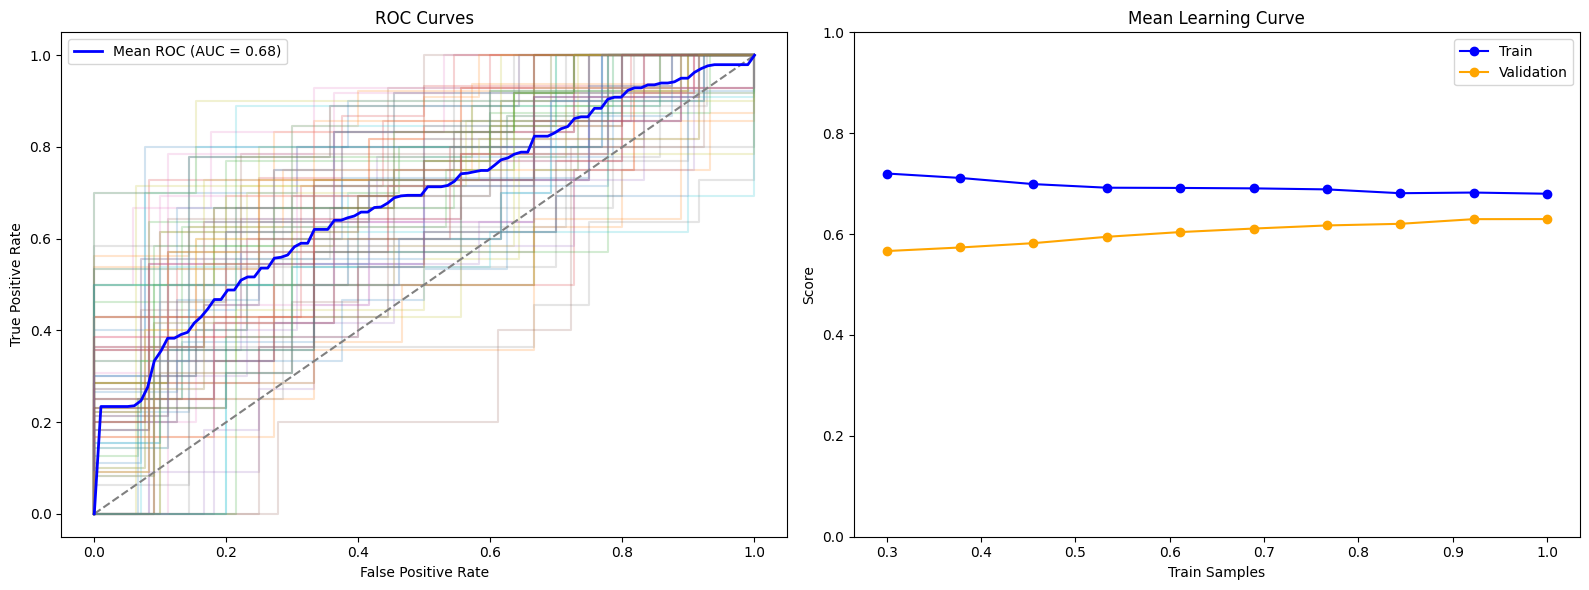

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score
from sklearn.model_selection import learning_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

# Zorg ervoor dat features en ground_truth numpy arrays zijn
features = np.array(features)
ground_truth = np.array(ground_truth)
# Opslag voor metrics
results = []
accuracies = []
sensitivities = []
specificities = []
f1_scores = []
auc_scores = []
roc_curves = []
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

# Voor learning curves
all_train_scores = []
all_test_scores = []
train_sizes_all = np.linspace(.3, 1.0, 10)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# 100 Random Splits
for run in range(100):
    print(f"Run {run + 1}/100")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=run)

    # Schalen
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # GridSearchCV voor PCA n_components
    param_grid = {
        'pca__n_components': [0.5]  # Variërende waarden voor n_components
    }

    # PCA + LDA
    pca = decomposition.PCA()
    lda = LinearDiscriminantAnalysis()

    # Maak een pipeline
    pipeline = make_pipeline(pca, lda)

    # GridSearchCV instellen voor de pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Beste model uit de GridSearch
    best_pca_n_components = grid_search.best_params_['pca__n_components']
    print(f"Beste aantal componenten (PCA): {best_pca_n_components}")

    # Voorspellingen en kansscore
    y_pred = grid_search.predict(X_test_scaled)
    y_score = grid_search.predict_proba(X_test_scaled)[:, 1]

    # Scores berekenen
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)

    # Print per run
    print(f"Accuracy     : {accuracy:.4f}")
    print(f"Sensitiviteit: {sensitivity:.4f}")
    print(f"Specificiteit: {specificity:.4f}")
    print(f"F1-score     : {f1:.4f}")
    print(f"AUC          : {auc_score:.4f}")

    # Opslaan
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1_scores.append(f1)
    auc_scores.append(auc_score)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    roc_curves.append((fpr, tpr, auc_score))

    results.append({
        "accuracy": accuracy,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "f1_score": f1,
        "auc": auc_score,
        "best_pca_components": best_pca_n_components
    })

    # Plot de ROC-curve voor deze run
    axes[0].plot(fpr, tpr, alpha=0.2)

    # Learning curve
    # plot_learning_curve(clf.best_estimator_, 'Learning Curve', X_train_scaled, y_train, axes[1])
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train_scaled, y_train,
                                                            train_sizes=train_sizes_all, cv=5, n_jobs=-1)
    all_train_scores.append(np.mean(train_scores, axis=1))
    all_test_scores.append(np.mean(test_scores, axis=1))

# Gemiddelden
mean_accuracy = np.mean(accuracies)
mean_sensitivity = np.mean(sensitivities)
mean_specificity = np.mean(specificities)
mean_f1 = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)

# Standaarddeviatie
std_accuracy = np.std(accuracies)
std_sensitivity = np.std(sensitivities)
std_specificity = np.std(specificities)
std_f1 = np.std(f1_scores)
std_auc = np.std(auc_scores)

# Confidence Intervals
ci_acc = stats.t.interval(0.95, len(accuracies)-1, loc=mean_accuracy, scale=std_accuracy/np.sqrt(len(accuracies)))
ci_sens = stats.t.interval(0.95, len(sensitivities)-1, loc=mean_sensitivity, scale=std_sensitivity/np.sqrt(len(sensitivities)))
ci_spec = stats.t.interval(0.95, len(specificities)-1, loc=mean_specificity, scale=std_specificity/np.sqrt(len(specificities)))
ci_f1 = stats.t.interval(0.95, len(f1_scores)-1, loc=mean_f1, scale=std_f1/np.sqrt(len(f1_scores)))
ci_auc = stats.t.interval(0.95, len(auc_scores)-1, loc=mean_auc, scale=std_auc/np.sqrt(len(auc_scores)))

# Print samenvatting
print("\n==== Gemiddelde resultaten over 100 runs ====")
print(f"Accuracy     : {mean_accuracy:.4f} ± {std_accuracy:.4f} (95% CI: {ci_acc})")
print(f"Sensitiviteit: {mean_sensitivity:.4f} ± {std_sensitivity:.4f} (95% CI: {ci_sens})")
print(f"Specificiteit: {mean_specificity:.4f} ± {std_specificity:.4f} (95% CI: {ci_spec})")
print(f"F1-score     : {mean_f1:.4f} ± {std_f1:.4f} (95% CI: {ci_f1})")
print(f"AUC          : {mean_auc:.4f} ± {std_auc:.4f} (95% CI: {ci_auc})")

# Top 10 resultaten
top_results = sorted(results, key=lambda x: x["accuracy"], reverse=True)[:10]
print("\nTop 10 Beste Runs:")
for i, res in enumerate(top_results):
    print(f"{i+1}. Acc: {res['accuracy']:.4f}, Sens: {res['sensitivity']:.4f}, Spec: {res['specificity']:.4f}, F1: {res['f1_score']:.4f}, AUC: {res['auc']:.4f}, Best PCA Components: {res['best_pca_components']}")

# Plot ROC-curve
mean_tpr /= 100
mean_tpr[0]=0
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean ROC (AUC = {mean_auc:.2f})')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curves")
axes[0].legend(loc="best")

# Plot Learning Curve
mean_train_scores = np.mean(all_train_scores, axis=0)
mean_test_scores = np.mean(all_test_scores, axis=0)
axes[1].plot(train_sizes, mean_train_scores, 'o-', color="b", label="Train")
axes[1].plot(train_sizes, mean_test_scores, 'o-', color="orange", label="Validation")
axes[1].set_xlabel("Train Samples")
axes[1].set_ylabel("Score")
axes[1].set_title("Mean Learning Curve")
axes[1].set_ylim(0, 1)
axes[1].legend(loc="best")

plt.tight_layout()
plt.show()


Testing with PCA variance ratio: 0.3
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

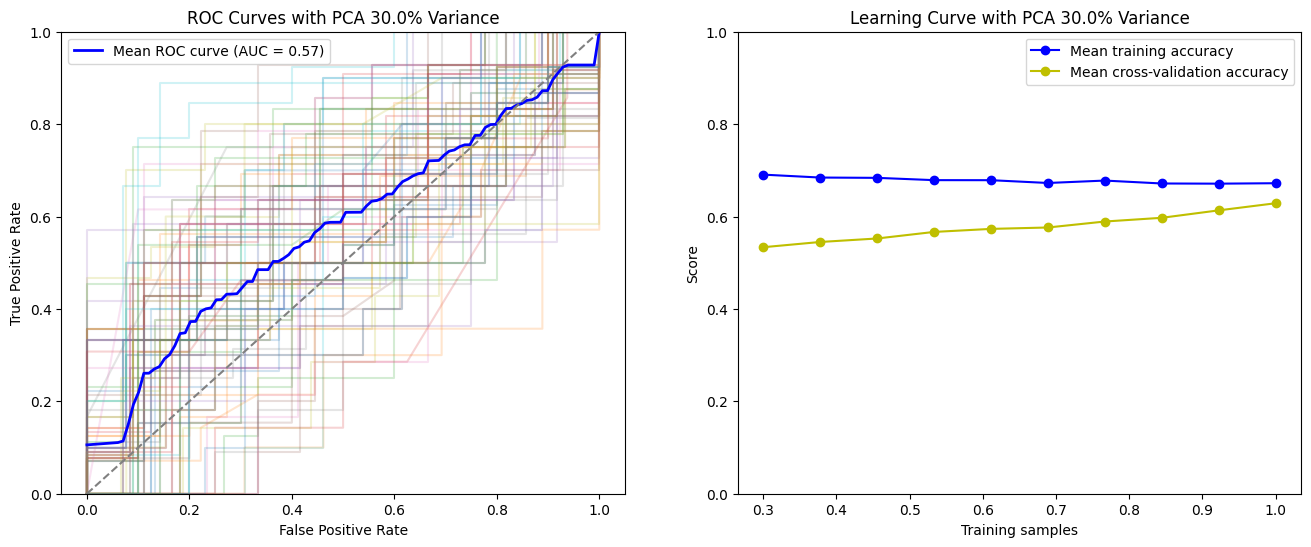

Testing with PCA variance ratio: 0.4
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

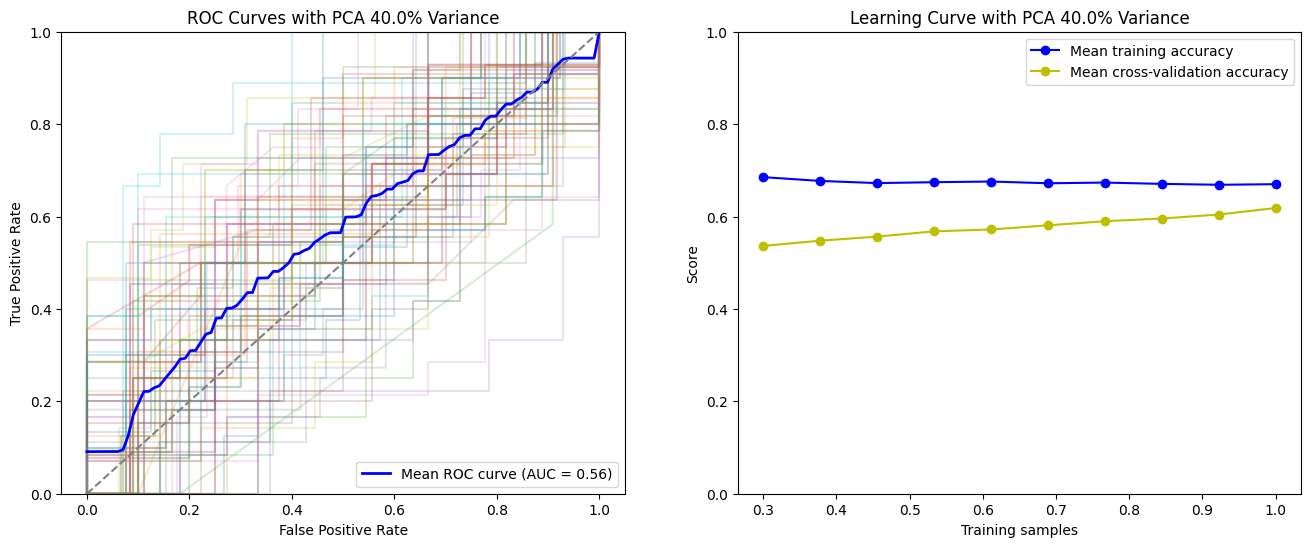

Testing with PCA variance ratio: 0.5
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

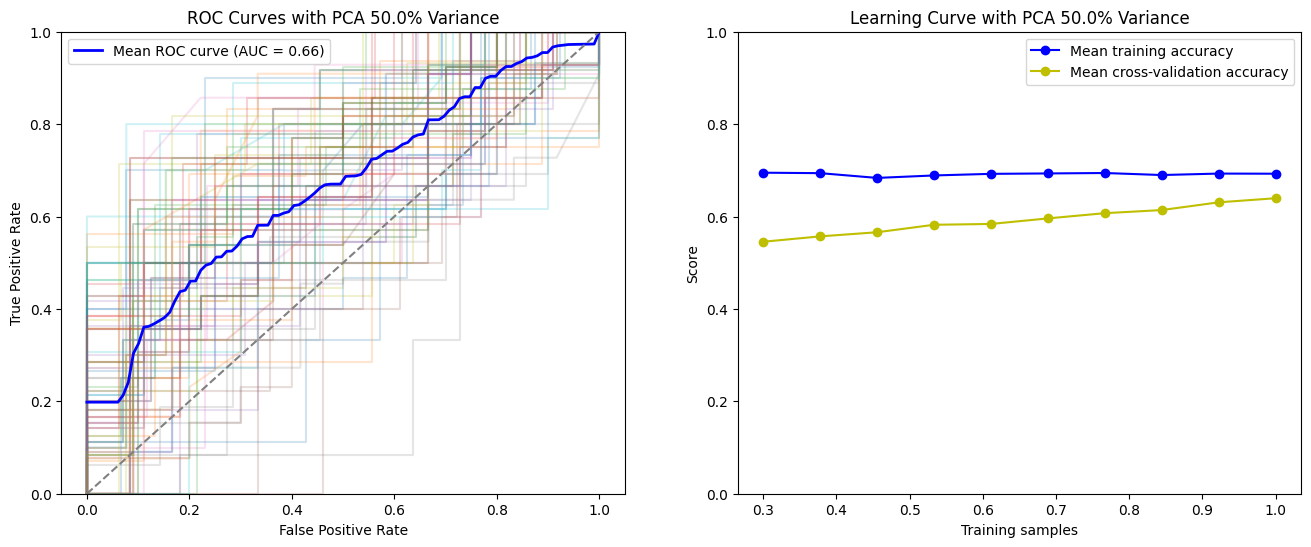

Testing with PCA variance ratio: 0.6
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

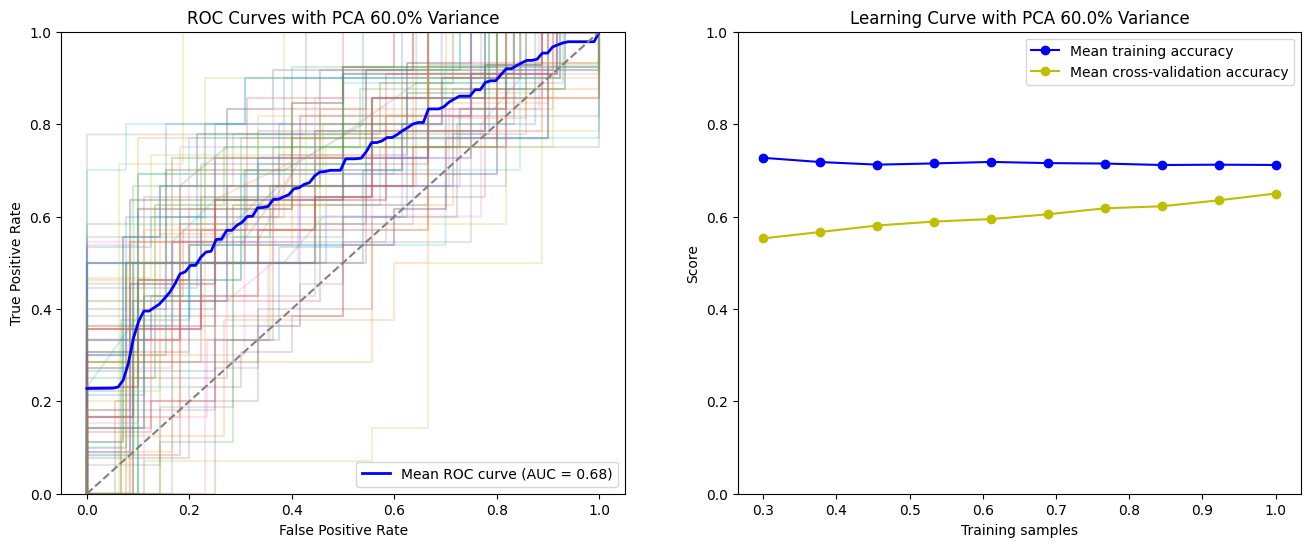

Testing with PCA variance ratio: 0.7
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

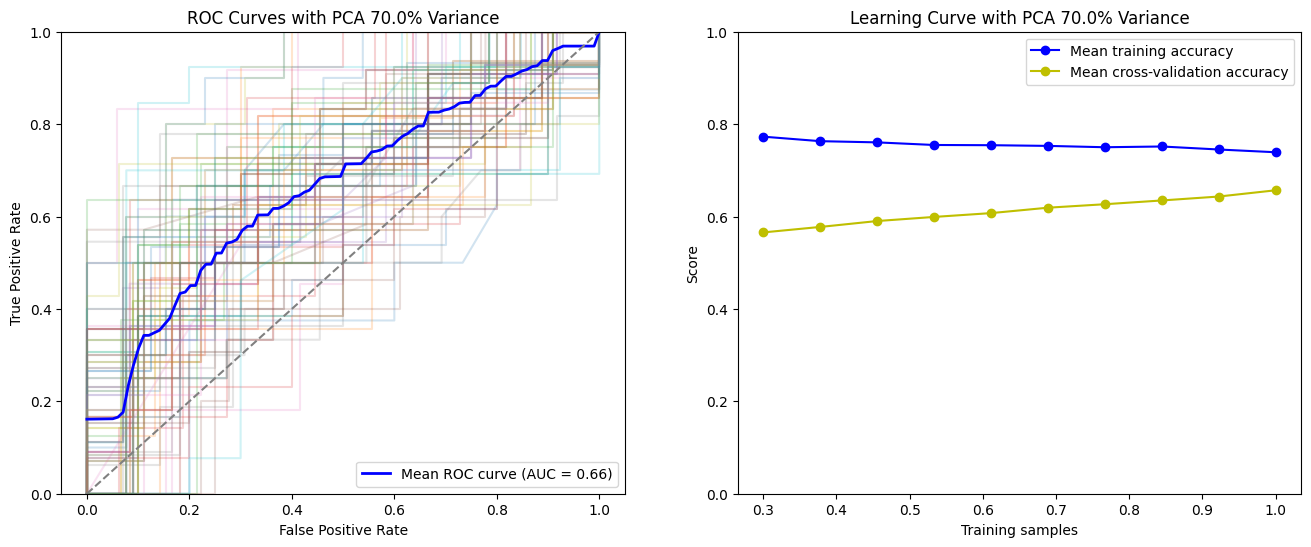

Testing with PCA variance ratio: 0.8
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

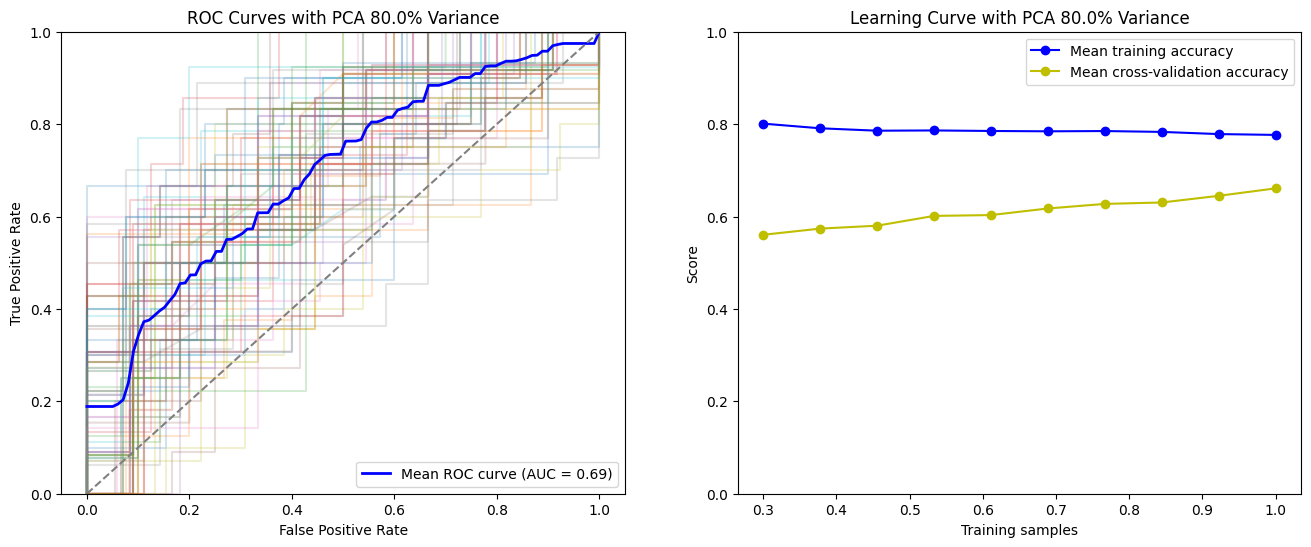

Testing with PCA variance ratio: 0.9
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

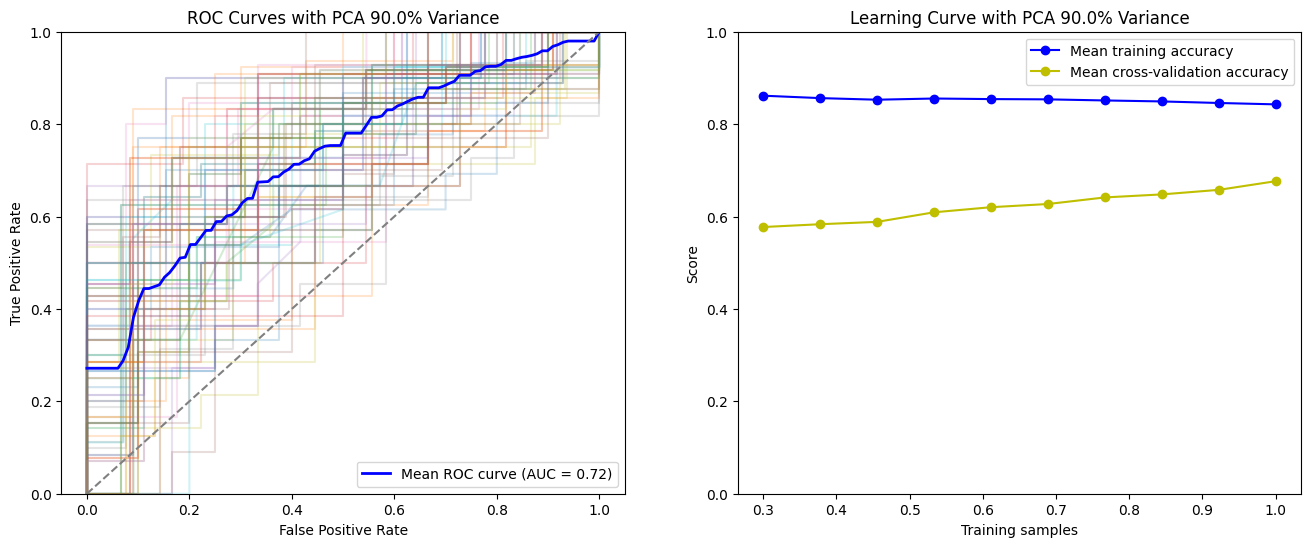

Testing with PCA variance ratio: 0.95
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

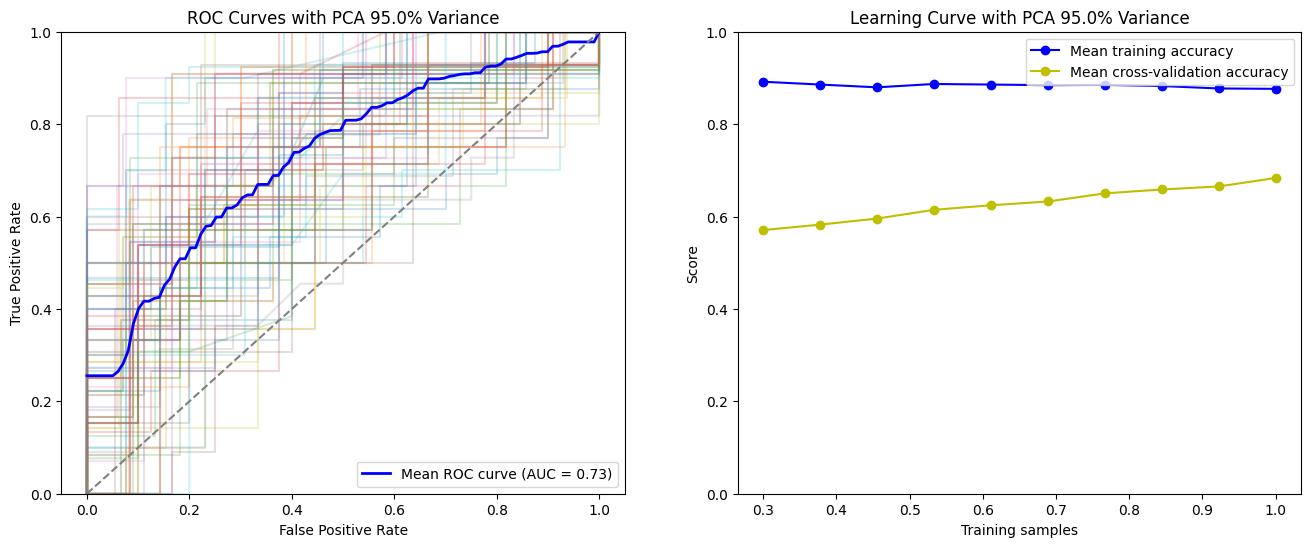

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score
from sklearn.model_selection import learning_curve
import statistics
from scipy import stats

# Zorg ervoor dat features en ground_truth numpy arrays zijn
features = np.array(features)  # Zet je DataFrame om naar een numpy array
ground_truth = np.array(ground_truth)  # Zet ground_truth om naar numpy array

# Hyperparameter grid
param_grid = [
    {'svc__C': [0.001, 0.01, 0.1, 0.5], 'svc__kernel': ['linear']},
    {'svc__C': [0.001, 0.01, 0.1, 0.5], 'svc__kernel': ['rbf'], 'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
    {'svc__C': [0.001, 0.01, 0.1, 0.5], 'svc__kernel': ['poly'], 'svc__degree': [2, 3, 4, 5]}
]


train_sizes_all = np.linspace(.3, 1.0, 10)

# Loop voor verschillende percentages van de variantie voor PCA
components_range = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

for components in components_range:  # Variëren van het aantal PCA-componenten
    print(f"Testing with PCA variance ratio: {components}")
    # Arrays voor het opslaan van resultaten
    results = []
    accuracies = []
    sensitivities = []
    specificities = []
    f1_scores = []
    roc_curves = []
    auc_scores = []

    # Arrays voor learning curve data
    all_train_scores = []
    all_test_scores = []
    # Maak een nieuwe figuur voor elke waarde van PCA-componenten
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # 100 Random Splits
    for run in range(100):  # 100 verschillende splits
        print(f"Run {run + 1}/100")

        # Split de data in training en test (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=run)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # PCA
        pca = decomposition.PCA(n_components=components)  # Aantal componenten op basis van de variantie

        # SVM
        svm = SVC(probability=True)  # Probability=True nodig voor ROC

        # Pipeline
        pipeline = make_pipeline(pca, svm)

        # GridSearch instellen
        clf = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
        clf.fit(X_train_scaled, y_train)

        # Beste model testen
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Confusion Matrix voor Sensitiviteit en Specificiteit
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        sensitivities.append(sensitivity)
        specificities.append(specificity)
        f1_scores.append(f1)

        # ROC berekenen
        y_score = clf.predict_proba(X_test_scaled)[:, 1]  # Positieve klasse kans
        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc_score = auc(fpr, tpr)
        auc_scores.append(auc_score)
        roc_curves.append((fpr, tpr, auc_score))
        # Resultaten opslaan
        results.append({"parameters": clf.best_params_, "accuracy": accuracy, "sensitivity": sensitivity,
                    "specificity": specificity, "f1_score": f1, "auc": auc_score})
        # Learning curve
        train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X_train_scaled, y_train,
                                                                train_sizes=train_sizes_all, cv=5, n_jobs=-1)
        all_train_scores.append(np.mean(train_scores, axis=1))
        all_test_scores.append(np.mean(test_scores, axis=1))

        # Plot de ROC-curve voor deze run
        axes[0].plot(fpr, tpr, alpha=0.2)

    # Gemiddelde en Standaarddeviatie
    mean_accuracy = np.mean(accuracies)
    mean_sensitivity = np.mean(sensitivities)
    mean_specificity = np.mean(specificities)
    mean_f1_score = np.mean(f1_scores)
    mean_auc = np.mean(auc_scores)

    # Bereken de gemiddelde ROC-curve
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)
    for fpr, tpr, _ in roc_curves:
        mean_tpr += np.interp(mean_fpr, fpr, tpr)

    mean_tpr /= 100

    # Plot de gemiddelde ROC-curve
    axes[0].plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean ROC curve (AUC = {mean_auc:.2f})')
    axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier lijn
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title(f"ROC Curves with PCA {components*100}% Variance")
    axes[0].set_ylim([0, 1])
    axes[0].legend(loc="best")

    # Gemiddelde Learning Curve
    mean_train_scores = np.mean(all_train_scores, axis=0)
    mean_test_scores = np.mean(all_test_scores, axis=0)
    axes[1].plot(train_sizes_all, mean_train_scores, 'o-', color="b", label="Mean training accuracy")
    axes[1].plot(train_sizes_all, mean_test_scores, 'o-', color="y", label="Mean cross-validation accuracy")
    axes[1].set_xlabel("Training samples")
    axes[1].set_ylabel("Score")
    axes[1].set_title(f"Learning Curve with PCA {components*100}% Variance")
    axes[1].legend(loc="best")
    axes[1].set_ylim([0, 1])
    plt.show()


Testing with PCA variance ratio: 0.3
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

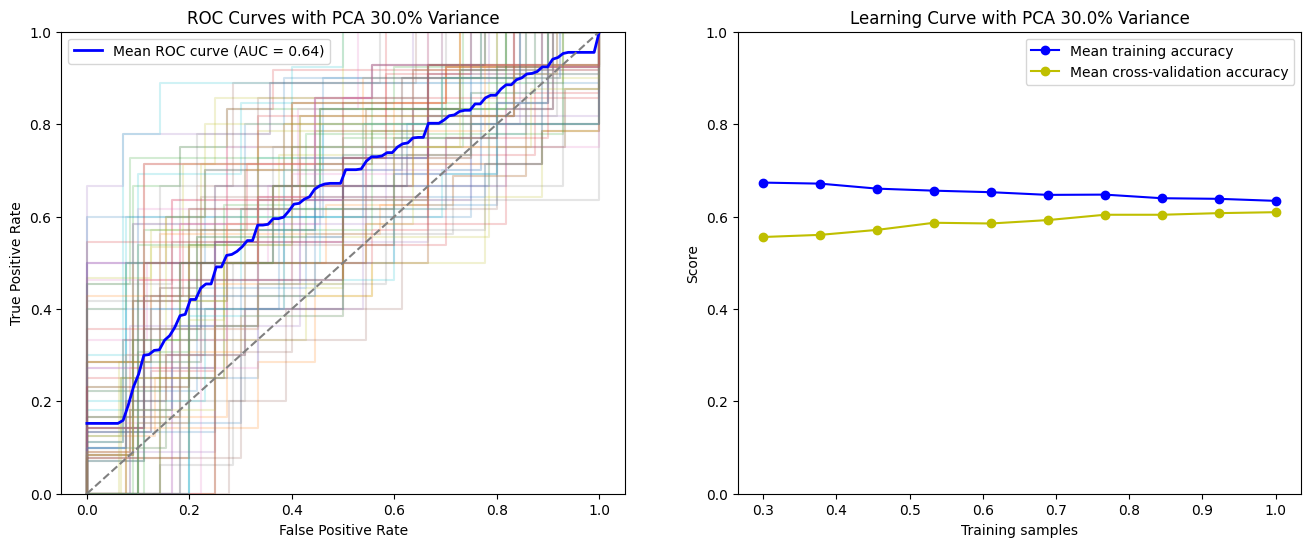

Testing with PCA variance ratio: 0.4
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

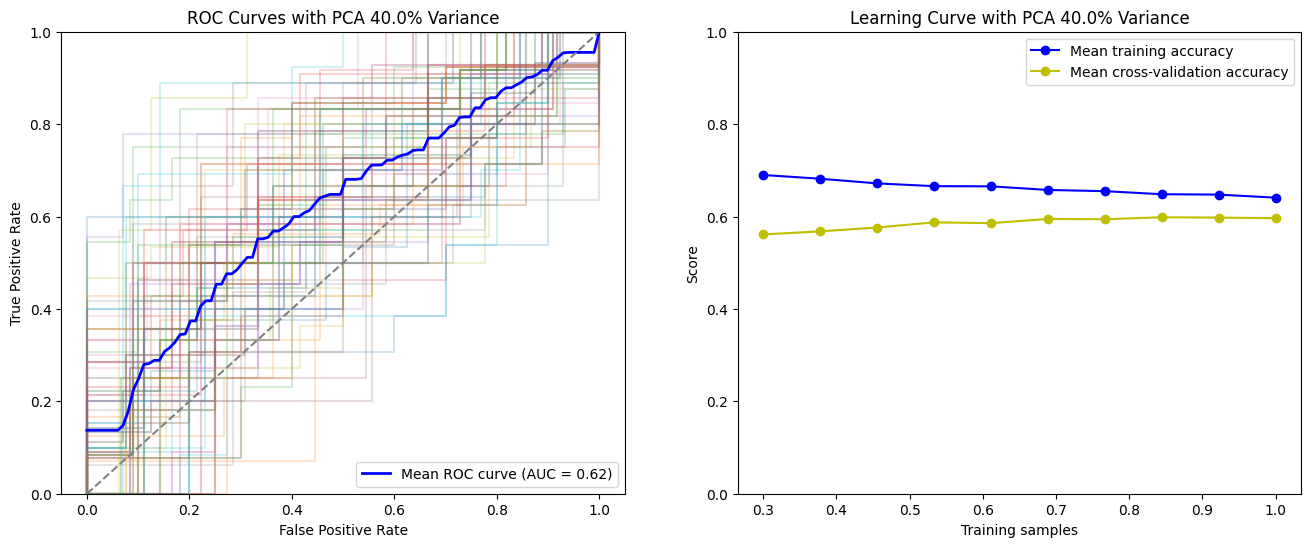

Testing with PCA variance ratio: 0.5
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

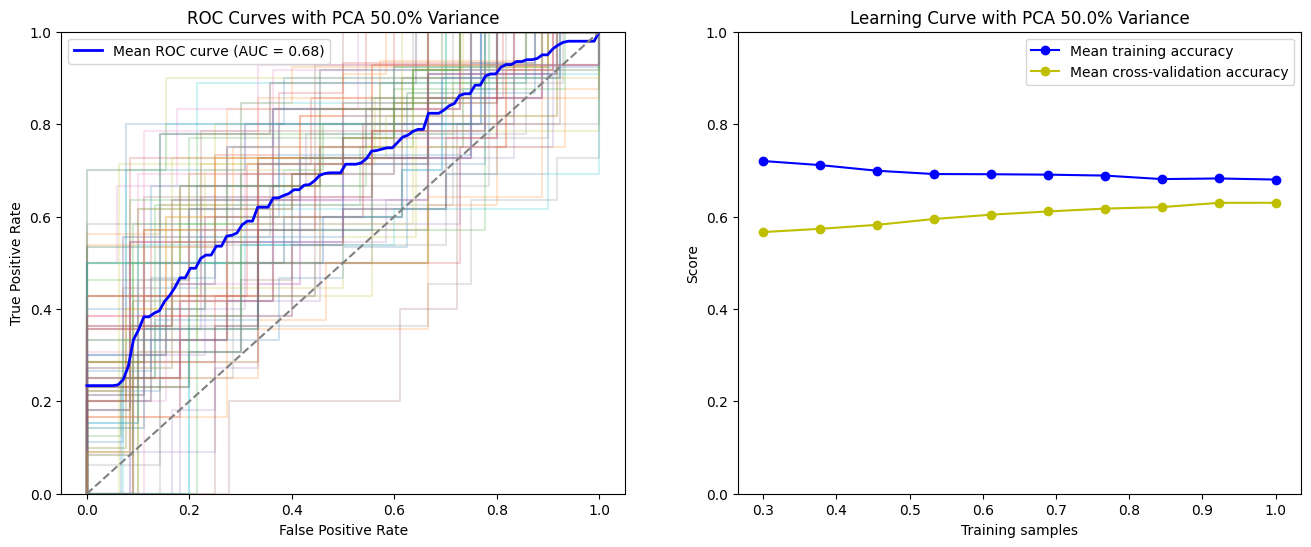

Testing with PCA variance ratio: 0.6
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

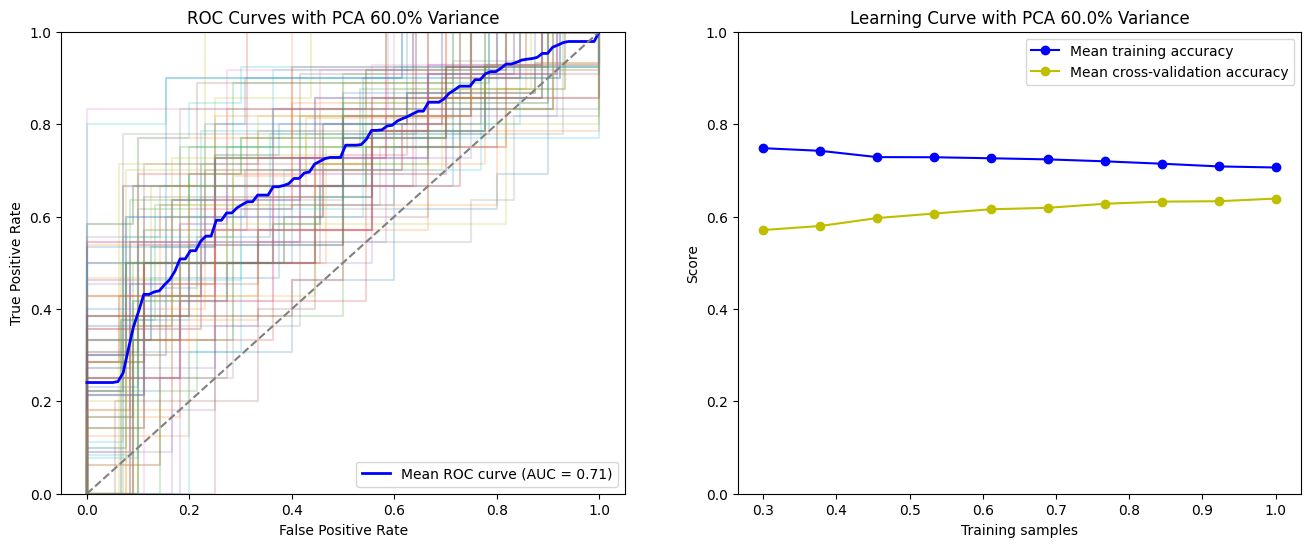

Testing with PCA variance ratio: 0.7
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

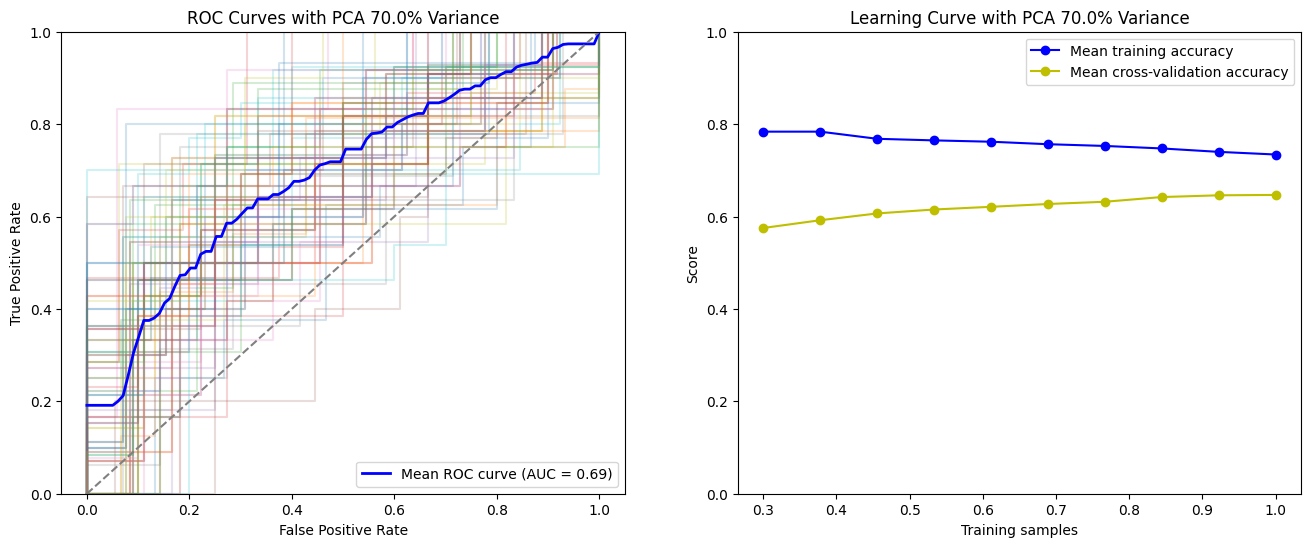

Testing with PCA variance ratio: 0.8
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

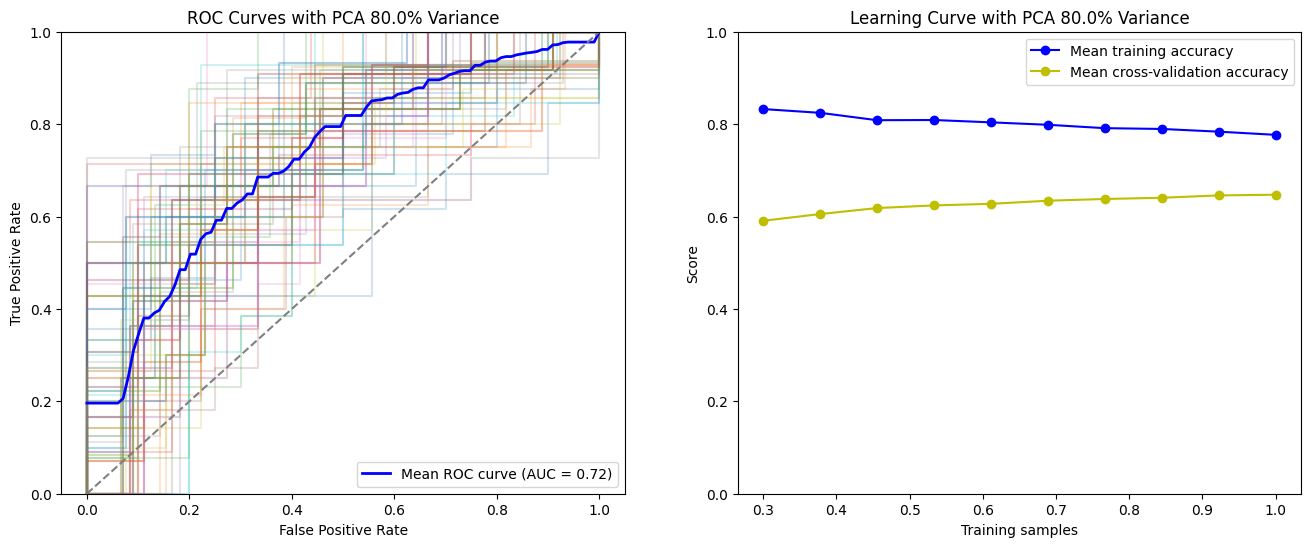

Testing with PCA variance ratio: 0.9
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 

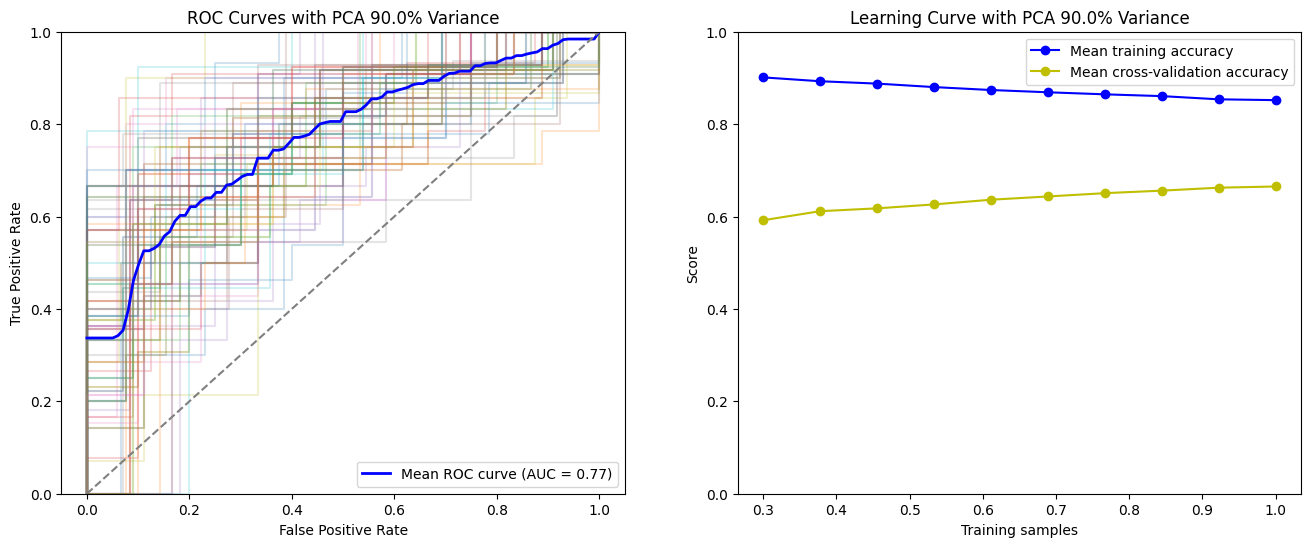

Testing with PCA variance ratio: 0.95
Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run

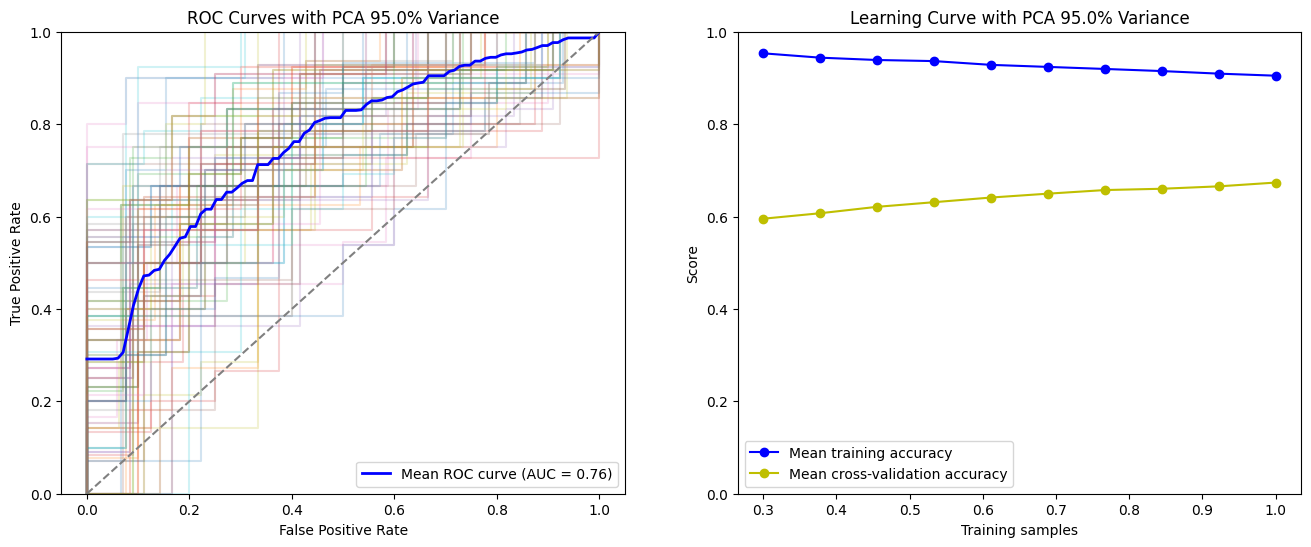

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score
from sklearn.model_selection import learning_curve
import statistics
from scipy import stats

# Zorg ervoor dat features en ground_truth numpy arrays zijn
features = np.array(features)  # Zet je DataFrame om naar een numpy array
ground_truth = np.array(ground_truth)  # Zet ground_truth om naar numpy array


train_sizes_all = np.linspace(.3, 1.0, 10)

# Loop voor verschillende percentages van de variantie voor PCA
components_range = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

for components in components_range:  # Variëren van het aantal PCA-componenten
    print(f"Testing with PCA variance ratio: {components}")
    # Arrays voor het opslaan van resultaten
    results = []
    accuracies = []
    sensitivities = []
    specificities = []
    f1_scores = []
    roc_curves = []
    auc_scores = []

    # Arrays voor learning curve data
    all_train_scores = []
    all_test_scores = []
    # Maak een nieuwe figuur voor elke waarde van PCA-componenten
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # 100 Random Splits
    for run in range(100):  # 100 verschillende splits
        print(f"Run {run + 1}/100")

        # Split de data in training en test (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=run)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # PCA
        pca = decomposition.PCA(n_components=components)  # Aantal componenten op basis van de variantie

        #lda
        lda = LinearDiscriminantAnalysis()

        # Pipeline
        pipeline = make_pipeline(pca, lda)

        clf = pipeline
        clf.fit(X_train_scaled, y_train)

        # Beste model testen
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Confusion Matrix voor Sensitiviteit en Specificiteit
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        sensitivities.append(sensitivity)
        specificities.append(specificity)
        f1_scores.append(f1)

        # ROC berekenen
        y_score = clf.predict_proba(X_test_scaled)[:, 1]  # Positieve klasse kans
        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc_score = auc(fpr, tpr)
        auc_scores.append(auc_score)
        roc_curves.append((fpr, tpr, auc_score))
        # Resultaten opslaan
        results.append({"parameters": clf, "accuracy": accuracy, "sensitivity": sensitivity,
                    "specificity": specificity, "f1_score": f1, "auc": auc_score})
        # Learning curve
        train_sizes, train_scores, test_scores = learning_curve(clf, X_train_scaled, y_train,
                                                                train_sizes=train_sizes_all, cv=5, n_jobs=-1)
        all_train_scores.append(np.mean(train_scores, axis=1))
        all_test_scores.append(np.mean(test_scores, axis=1))

        # Plot de ROC-curve voor deze run
        axes[0].plot(fpr, tpr, alpha=0.2)

    # Gemiddelde en Standaarddeviatie
    mean_accuracy = np.mean(accuracies)
    mean_sensitivity = np.mean(sensitivities)
    mean_specificity = np.mean(specificities)
    mean_f1_score = np.mean(f1_scores)
    mean_auc = np.mean(auc_scores)

    # Bereken de gemiddelde ROC-curve
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)
    for fpr, tpr, _ in roc_curves:
        mean_tpr += np.interp(mean_fpr, fpr, tpr)

    mean_tpr /= 100

    # Plot de gemiddelde ROC-curve
    axes[0].plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean ROC curve (AUC = {mean_auc:.2f})')
    axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier lijn
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title(f"ROC Curves with PCA {components*100}% Variance")
    axes[0].set_ylim([0, 1])
    axes[0].legend(loc="best")

    # Gemiddelde Learning Curve
    mean_train_scores = np.mean(all_train_scores, axis=0)
    mean_test_scores = np.mean(all_test_scores, axis=0)
    axes[1].plot(train_sizes_all, mean_train_scores, 'o-', color="b", label="Mean training accuracy")
    axes[1].plot(train_sizes_all, mean_test_scores, 'o-', color="y", label="Mean cross-validation accuracy")
    axes[1].set_xlabel("Training samples")
    axes[1].set_ylabel("Score")
    axes[1].set_title(f"Learning Curve with PCA {components*100}% Variance")
    axes[1].legend(loc="best")
    axes[1].set_ylim([0, 1])
    plt.show()


Run 1/100
Beste hyperparameters: {'max_features': 0.5, 'min_impurity_decrease': 0.1, 'n_estimators': 90}
Test accuracy: 0.7391
Sensitivity: 0.8750
Specificity: 0.6667
F1 score: 0.7000
AUC score voor deze run: 0.8583
Run 2/100
Beste hyperparameters: {'max_features': 0.5, 'min_impurity_decrease': 0.1, 'n_estimators': 90}
Test accuracy: 0.7391
Sensitivity: 0.7500
Specificity: 0.7333
F1 score: 0.6667
AUC score voor deze run: 0.6667
Run 3/100
Beste hyperparameters: {'max_features': 0.5, 'min_impurity_decrease': 0.2, 'n_estimators': 75}
Test accuracy: 0.8261
Sensitivity: 0.6667
Specificity: 1.0000
F1 score: 0.8000
AUC score voor deze run: 0.8333
Run 4/100
Beste hyperparameters: {'max_features': 0.5, 'min_impurity_decrease': 0.1, 'n_estimators': 75}
Test accuracy: 0.7391
Sensitivity: 0.5000
Specificity: 1.0000
F1 score: 0.6667
AUC score voor deze run: 0.7576
Run 5/100
Beste hyperparameters: {'max_features': 0.5, 'min_impurity_decrease': 0.005, 'n_estimators': 75}
Test accuracy: 0.7391
Sensiti

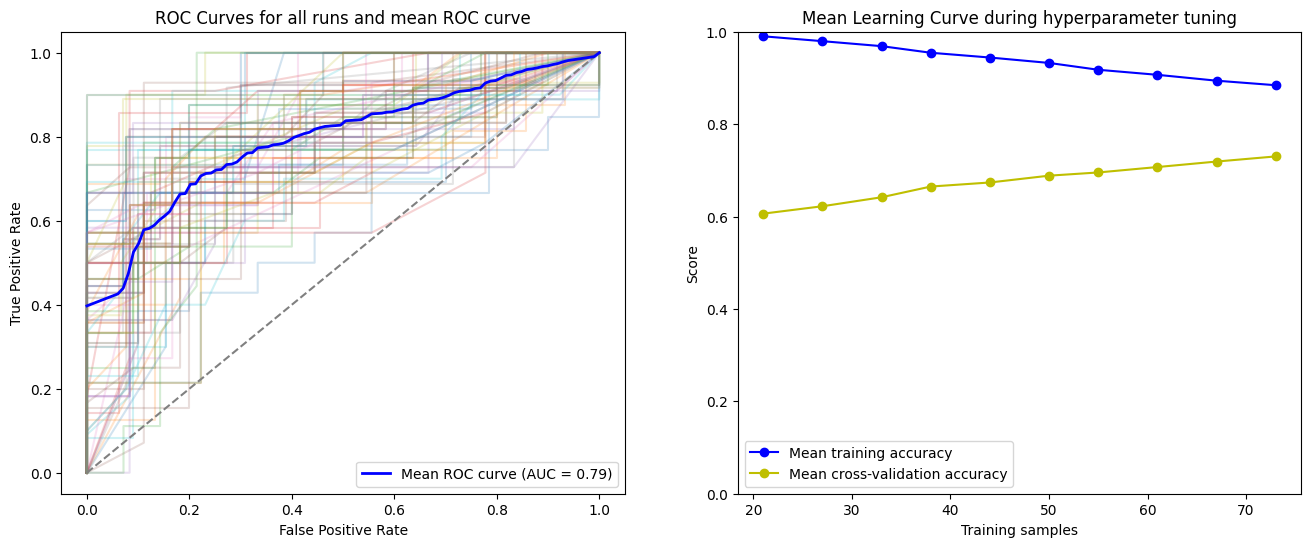

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Zorg ervoor dat features en ground_truth numpy arrays zijn
features = np.array(features)  # Zet je DataFrame om naar een numpy array
ground_truth = np.array(ground_truth)  # Zet ground_truth om naar numpy array

# Hyperparameter tuning met GridSearchCV
param_grid = {
        'n_estimators': [60, 75, 90],
        # 'max_depth': [10, 12, 15],
        # 'min_samples_split': [10, 12, 14],
        # 'min_samples_leaf': [5, 7, 9],
        'min_impurity_decrease': [0.005, 0.1, 0.2],
        'max_features': [0.5]
    }

# Opslag voor accuracies en metrics
results = []
accuracies = []
sensitivities = []
specificities = []
f1_scores = []
roc_curves = []
auc_scores = []
mean_fpr = np.linspace(0, 1, 100)  # Genereer een vaste FPR voor de gemiddelde ROC-curve
mean_tpr = np.zeros_like(mean_fpr)  # Zet de gemiddelde TPR op 0

# Arrays for learning curve data
all_train_scores = []
all_test_scores = []
train_sizes_all = np.linspace(.3, 1.0, 10)
# Create subplots for both ROC and Learning Curves
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Aantal random splits
split = 100

for run in range(split):
    print(f"Run {run + 1}/{split}")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, ground_truth, test_size=0.2, random_state=run)

    # Train a Random Forest model to get feature importances
    forest_importance = RandomForestClassifier(random_state=42)
    forest_importance.fit(X_train, y_train)
    importances = forest_importance.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_n = 100  # Number of top features to select
    top_feature_indices = indices[:]

    # Select the top features from training and testing data
    X_train_selected = X_train[:, top_feature_indices]
    X_test_selected = X_test[:, top_feature_indices]

    # Random Forest model
    forest = RandomForestClassifier()

    # GridSearch instellen
    clf = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit on the selected features
    clf.fit(X_train_selected, y_train)

    # Beste model testen
    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Confusion Matrix voor Sensitiviteit en Specificiteit
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1_scores.append(f1)

    # ROC berekenen
    y_score = clf.predict_proba(X_test_selected)[:, 1]  # Positieve klasse kans
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    auc_scores.append(auc_score)
    roc_curves.append((fpr, tpr, auc_score))

    # Resultaten opslaan
    results.append({"parameters": clf.best_params_, "accuracy": accuracy, "sensitivity": sensitivity,
                    "specificity": specificity, "f1_score": f1, "auc": auc_score})
    print(f"Beste hyperparameters: {clf.best_params_}")
    print(f"Test accuracy: {accuracy:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 score: {f1:.4f}")
    print(f"AUC score voor deze run: {auc_score:.4f}")

    # Interpoleer de TPR naar een vaste FPR om de gemiddelde ROC-curve te berekenen
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

    # Plot de ROC-curve voor deze run
    axes[0].plot(fpr, tpr, alpha=0.2)

    # Learning curve
    # plot_learning_curve(clf.best_estimator_, 'Learning Curve', X_train_scaled, y_train, axes[1])
    train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X_train_selected, y_train,
                                                            train_sizes=train_sizes_all, cv=5, n_jobs=-1)
    all_train_scores.append(np.mean(train_scores, axis=1))
    all_test_scores.append(np.mean(test_scores, axis=1))

# Gemiddelde en Standaarddeviatie
mean_accuracy = np.mean(accuracies)
mean_sensitivity = np.mean(sensitivities)
mean_specificity = np.mean(specificities)
mean_f1_score = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)

std_accuracy = np.std(accuracies)
std_sensitivity = np.std(sensitivities)
std_specificity = np.std(specificities)
std_f1_score = np.std(f1_scores)
std_auc = np.std(auc_scores)

#gemiddelde learningcurve variabelen
mean_train_scores = np.mean(all_train_scores, axis=0)
mean_test_scores = np.mean(all_test_scores, axis=0)
# Confidence Intervals (95% CI)
confidence_interval_accuracy = stats.t.interval(0.95, len(accuracies)-1, loc=mean_accuracy, scale=std_accuracy/np.sqrt(len(accuracies)))
confidence_interval_sensitivity = stats.t.interval(0.95, len(sensitivities)-1, loc=mean_sensitivity, scale=std_sensitivity/np.sqrt(len(sensitivities)))
confidence_interval_specificity = stats.t.interval(0.95, len(specificities)-1, loc=mean_specificity, scale=std_specificity/np.sqrt(len(specificities)))
confidence_interval_f1 = stats.t.interval(0.95, len(f1_scores)-1, loc=mean_f1_score, scale=std_f1_score/np.sqrt(len(f1_scores)))
confidence_interval_auc = stats.t.interval(0.95, len(auc_scores)-1, loc=mean_auc, scale=std_auc/np.sqrt(len(auc_scores)))

# Gemiddelde en Confidence Intervals printen
print(f"\nMean test accuracy over 100 runs: {mean_accuracy:.4f} (SD: {std_accuracy:.4f}, 95% CI: {confidence_interval_accuracy})")
print(f"Mean sensitivity over 100 runs: {mean_sensitivity:.4f} (SD: {std_sensitivity:.4f}, 95% CI: {confidence_interval_sensitivity})")
print(f"Mean specificity over 100 runs: {mean_specificity:.4f} (SD: {std_specificity:.4f}, 95% CI: {confidence_interval_specificity})")
print(f"Mean F1-score over 100 runs: {mean_f1_score:.4f} (SD: {std_f1_score:.4f}, 95% CI: {confidence_interval_f1})")
print(f"Mean AUC over 100 runs: {mean_auc:.4f} (SD: {std_auc:.4f}, 95% CI: {confidence_interval_auc})")

# Sorteren en tonen van resultaten
sorted_results = sorted(results, key=lambda x: x["accuracy"], reverse=True)[:10]
print("\nTop 10 Best Results:")
for i, res in enumerate(sorted_results):
    print(f"{i+1}. Hyperparameters: {res['parameters']}, Accuracy: {res['accuracy']:.4f}, Sensitivity: {res['sensitivity']:.4f}, Specificity: {res['specificity']:.4f}, F1: {res['f1_score']:.4f}, AUC: {res['auc']:.4f}")

# ROC-curve plotting met labels
mean_tpr /= 100
# Genereer de gemiddelde ROC-curve
axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray")
axes[0].plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean ROC curve (AUC = {mean_auc:.2f})')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curves for all runs and mean ROC curve")
axes[0].legend(loc="best")

# Learning curve plotting met labels
axes[1].plot(train_sizes, mean_train_scores, 'o-', color="b", label="Mean training accuracy")
axes[1].plot(train_sizes, mean_test_scores, 'o-', color="y", label="Mean cross-validation accuracy")
axes[1].set_xlabel("Training samples")
axes[1].set_ylabel("Score")
axes[1].set_title("Mean Learning Curve during hyperparameter tuning")
axes[1].set_ylim(0, 1)
axes[1].legend(loc="best")

# Vergelijking modellen

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc

# Zorg dat features en ground_truth numpy arrays zijn
features = np.array(features)
ground_truth = np.array(ground_truth)

# Pipelines definiëren
pipelines = {
    "Pipeline 1: KNN + SelectFromModel": make_pipeline(
        MinMaxScaler(),
        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold=0.01),
        KNeighborsClassifier(n_neighbors=25)
    ),
    "Pipeline 2: PCA + SVM": make_pipeline(
        StandardScaler(),
        PCA(n_components=0.95),
        SVC(C= 0.01, kernel='linear', probability=True)
    ),
    "Pipeline 3: RandomForest": RandomForestClassifier(max_depth=10, max_features=0.5,
                                                       min_impurity_decrease=0.0, min_samples_leaf=7, min_samples_split=14, n_estimators=60),
    "Pipeline 4: PCA + LDA": make_pipeline(
        StandardScaler(),
        PCA(n_components=0.95),
        LinearDiscriminantAnalysis()
    )
}

# Cross-validatie
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mean_fpr = np.linspace(0, 1, 100)

# Resultaten opslaan
results = {}

# Subplots voor ROC en learning curves
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].set_title("ROC Curves")
axes[1].set_title("Learning Curves")

for name, pipeline in pipelines.items():
    print(f"\nEvaluatie van: {name}")
    accuracies = []
    mean_tpr = np.zeros_like(mean_fpr)
    aucs = []

    for fold, (train_idx, test_idx) in enumerate(cv.split(features, ground_truth), 1):
        X_train, X_test = features[train_idx], features[test_idx]
        y_train, y_test = ground_truth[train_idx], ground_truth[test_idx]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # ROC/AUC
        if hasattr(pipeline, "predict_proba"):
            y_score = pipeline.predict_proba(X_test)[:, 1]
        else:
            y_score = pipeline.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        mean_tpr += np.interp(mean_fpr, fpr, tpr)

        print(f"  Fold {fold} - Accuracy: {accuracy:.4f}, AUC: {roc_auc:.4f}")

    mean_tpr /= cv.get_n_splits()
    mean_auc = auc(mean_fpr, mean_tpr)
    mean_accuracy = np.mean(accuracies)

    results[name] = {
        'mean_tpr': mean_tpr,
        'mean_auc': mean_auc,
        'accuracies': accuracies,
        'mean_accuracy': mean_accuracy
    }

    # ROC-curve tekenen
    axes[0].plot(mean_fpr, mean_tpr, lw=2, label=f"{name} (AUC = {mean_auc:.2f})")

    # Learning curve plotten
    train_sizes, train_scores, test_scores = learning_curve(pipeline, features, ground_truth, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.2, 1.0, 10))
    print(train_sizes)
    print(train_scores)
    print(test_scores)
    # Bereken gemiddelde scores en standaarddeviaties
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Learning curve plotten
    axes[1].plot(train_sizes, train_scores_mean, label=f"{name} Training score", lw=2)
    axes[1].plot(train_sizes, test_scores_mean, label=f"{name} CV score", lw=2)

# Plot ROC
axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random chance")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc='lower right')
axes[0].grid(True)

# Learning curve
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("Score")
axes[1].legend(loc="best")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Samenvatting
print("\n=== Samenvatting ===")
for name, res in results.items():
    print(f"{name}: Accuracy = {res['mean_accuracy']:.4f}, AUC = {res['mean_auc']:.4f}")
